In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pingouin as pg
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

from matplotlib import ticker

%matplotlib inline 

from platform import python_version
print(python_version())

3.8.5


In [2]:
# read in census data at the census tract level

In [3]:
import censusdata

In [4]:
census_datapoints = {
 'B01003_001E': 'Total Pop',
 'B03002_003E': 'White Pop',
 'B03002_004E': 'Black Pop',
 'B03002_012E': 'Hispanic Pop',
 'B03002_006E': 'Asian Pop',
        
 'B01001_001E': 'Total Population',
 'B01001_002E': 'Male',
 
 'B19001_001E': 'Tot HHs',
 'B19001_002E': 'HH < 10K',
 'B19001_003E': '10k < HH < 15K',
 'B19001_004E': '15k < HH < 20K',
 'B19001_005E': '20k < HH < 25K',
 'B19001_006E': '25k < HH < 30K',
 'B19001_007E': '30k < HH < 35K',
 'B19001_008E': '35k < HH < 40K',
 'B19001_009E': '40k < HH < 45K',
 'B19001_010E': '45k < HH < 50K',
 'B19001_011E': '50k < HH < 60K',
 'B19001_012E': '60k < HH < 75K',
 'B19001_013E': '75k < HH < 100K',
 'B19001_014E': '100k < HH < 125K',
 'B19001_015E': '125k < HH < 150K',
 'B19001_016E': '150k < HH < 200K',
 'B19001_017E': '200k < HH',
 
 'B23025_005E': 'Unemployed Labor Force',
 'B23025_003E': 'Labor Force',
 
 'B06009_001E': 'Education Known',
 'B06009_002E': 'Less than HS',
 'B06009_003E': 'HS',
 'B06009_004E': 'Some College',
 'B06009_005E': 'College',
 'B06009_006E': 'Graduate',
 
 'B25003_001E': 'Houses',
 'B25003_002E': 'Owner-occupied houses',
 
 'B25109_001E': 'Median house price',

 'B27011_001E': 'Insurance Denominator',   
 'B27011_007E': 'Uninsured Numerator 1',
 'B27011_012E': 'Uninsured Numerator 2',
 'B27011_017E': 'Uninsured Numerator 3',
    
# 'B01001_001E': 'Total Population',
 'B01001_003E': 'Under 18 1',
 'B01001_004E': 'Under 18 2',
 'B01001_005E': 'Under 18 3', 
 'B01001_006E': 'Under 18 4',
 'B01001_027E': 'Under 18 5',
 'B01001_028E': 'Under 18 6', 
 'B01001_029E': 'Under 18 7',
 'B01001_030E': 'Under 18 8',
    
 'B01001_007E': '18 - 40 1',
 'B01001_008E': '18 - 40 2',    
 'B01001_009E': '18 - 40 3',  
 'B01001_010E': '18 - 40 4',
 'B01001_011E': '18 - 40 5',    
 'B01001_012E': '18 - 40 6',    
 'B01001_013E': '18 - 40 7',  
 'B01001_031E': '18 - 40 8',
 'B01001_032E': '18 - 40 9',    
 'B01001_033E': '18 - 40 10',  
 'B01001_034E': '18 - 40 11',
 'B01001_035E': '18 - 40 12',    
 'B01001_036E': '18 - 40 13',    
 'B01001_037E': '18 - 40 14',
    
 'B01001_014E': '40 - 60 1',
 'B01001_015E': '40 - 60 2',    
 'B01001_016E': '40 - 60 3',  
 'B01001_017E': '40 - 60 4',
 'B01001_038E': '40 - 60 5',    
 'B01001_039E': '40 - 60 6',    
 'B01001_040E': '40 - 60 7',  
 'B01001_041E': '40 - 60 8',
    
 'B01001_018E': '60 - 80 1',
 'B01001_019E': '60 - 80 2',    
 'B01001_020E': '60 - 80 3',  
 'B01001_021E': '60 - 80 4',
 'B01001_022E': '60 - 80 5',    
 'B01001_023E': '60 - 80 6', 
 'B01001_042E': '60 - 80 7',
 'B01001_043E': '60 - 80 8',    
 'B01001_044E': '60 - 80 9',  
 'B01001_045E': '60 - 80 10',
 'B01001_046E': '60 - 80 11',    
 'B01001_047E': '60 - 80 12'
 }
        

state_codes = [      '01', '02',       '04', '05', '06',       '08', '09',
               '10', '11', '12', '13',       '15', '16', '17', '18', '19', 
               '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
               '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
               '40', '41', '42',       '44', '45', '46', '47', '48', '49',
               '50', '51',       '53', '54', '55', '56'
              ]
    
state_data = []
for state in state_codes:
    state_data.append(censusdata.download('acs5', 2018, censusdata.censusgeo([('state', state) , 
                                        ('county', '*'),
                                         ('tract', '*')]), 
                                         list(census_datapoints.keys())))
df = pd.concat(state_data)
df['Census ID'] = df.index
df['Tract'] = df['Census ID'].apply(lambda x: str(x).split('tract:')[-1]) #.astype(int)
df['County Code'] = df['Census ID'].apply(lambda x: str(x).split('county:')[-1][:3])
df['State Code'] = df['Census ID'].apply(lambda x: str(x).split('state:')[-1][:2])
df['County'] = df['Census ID'].apply(lambda x: str(x).split(', ')[1][:-7])
df['State'] = df['Census ID'].apply(lambda x: str(x).split(', ')[2].split(':')[0])
df['GEOID'] = (df['State Code'] + df['County Code'] + df['Tract'].astype(str)).astype(int)
del df['Census ID']

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [5]:
#download the square mileage of each zip code

state_data = []
for state in state_codes:
    gazeteer_url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2019_Gazetteer/2019_gaz_tracts_' + state + '.txt'
    census_tract_geometry = pd.read_table(gazeteer_url)
    state_data.append(census_tract_geometry)
    
df_geo = pd.concat(state_data)
df_geo.rename(columns={'ALAND_SQMI':'Square Miles'}, inplace=True)

df = pd.merge(df,df_geo[['GEOID', 'Square Miles']], on='GEOID')

df = df[df['Square Miles'] > 0]


In [6]:
df.shape

(72739, 88)

In [7]:
# clean up

df = df.rename(columns=census_datapoints)

df['frac_female'] = 1 - df['Male'] / df['Total Population']

df['frac_white'] = df['White Pop'] / df['Total Pop']
df['frac_black'] = df['Black Pop'] / df['Total Pop']
df['frac_hispanic'] = df['Hispanic Pop'] / df['Total Pop']
df['frac_asian'] = df['Asian Pop'] / df['Total Pop']
df['frac_other'] = 1 - df.frac_white - df.frac_black - df.frac_hispanic - df.frac_asian

df['frac_under_18'] = (df['Under 18 1'] + df['Under 18 2'] + df['Under 18 3'] + df['Under 18 4'] + df['Under 18 5'] + df['Under 18 6'] + df['Under 18 7'] + df['Under 18 8']) / df['Total Population']
df['frac_18_to_40'] = (df['18 - 40 1'] + df['18 - 40 2'] + df['18 - 40 3'] + df['18 - 40 4'] + df['18 - 40 5'] + df['18 - 40 6'] + df['18 - 40 7'] + df['18 - 40 8'] + df['18 - 40 9'] + df['18 - 40 10'] + df['18 - 40 11'] + df['18 - 40 12'] + df['18 - 40 13'] + df['18 - 40 14']) / df['Total Population']
df['frac_40_to_60'] = (df['40 - 60 1'] + df['40 - 60 2'] + df['40 - 60 3'] + df['40 - 60 4'] + df['40 - 60 5'] + df['40 - 60 6'] + df['40 - 60 7'] + df['40 - 60 8']) / df['Total Population']
df['frac_60_to_80'] = (df['60 - 80 1'] + df['60 - 80 2'] + df['60 - 80 3'] + df['60 - 80 4'] + df['60 - 80 5'] + df['60 - 80 6'] + df['60 - 80 7'] + df['60 - 80 8'] + df['60 - 80 9'] + df['60 - 80 10'] + df['60 - 80 11'] + df['60 - 80 12']) / df['Total Population']
df['frac_80_plus'] = 1 - df.frac_under_18 - df.frac_18_to_40 - df.frac_40_to_60 - df.frac_60_to_80

df['frac_lt_15k'] = (df['HH < 10K'] + df['10k < HH < 15K']) / df['Tot HHs']
df['frac_15k_to_30k'] = (df['15k < HH < 20K'] + df['20k < HH < 25K'] + df['25k < HH < 30K']) / df['Tot HHs']
df['frac_30k_to_45k'] = (df['30k < HH < 35K'] + df['35k < HH < 40K'] + df['40k < HH < 45K']) / df['Tot HHs']
df['frac_45k_to_60k'] = (df['45k < HH < 50K'] + df['50k < HH < 60K']) / df['Tot HHs']
df['frac_60k_to_100k'] = (df['60k < HH < 75K'] + df['75k < HH < 100K']) / df['Tot HHs']
df['frac_100k_to_125k'] = (df['100k < HH < 125K'] ) / df['Tot HHs']
df['frac_125k_to_200k'] = (df['125k < HH < 150K'] + df['150k < HH < 200K']) / df['Tot HHs']
df['frac_gt_200k'] = (df['200k < HH']) / df['Tot HHs']

df['frac_unemployed'] = df['Unemployed Labor Force'] / df['Labor Force']
df['frac_no_health_insurance'] = (df['Uninsured Numerator 1'] + df['Uninsured Numerator 2'] + df['Uninsured Numerator 3'])/df['Insurance Denominator']

df['frac_lt_hs'] = df['Less than HS'] / df['Education Known']
df['frac_hs'] = df['HS'] / df['Education Known']
df['frac_some_college'] = df['Some College'] / df['Education Known']
df['frac_college'] = df['College'] / df['Education Known']
df['frac_graduate'] = df['Graduate'] / df['Education Known']

df['frac_houses_owner_occupied'] = df['Owner-occupied houses'] / df['Houses']

df['pop_density'] = df['Total Pop'] / df['Square Miles']

df['median_house_price'] = df['Median house price']

df = df[['GEOID', 'Tract', 'County Code', 'County', 'State Code', 'State', 'Square Miles',
     'Total Pop', 'pop_density','frac_female', 
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
     'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed',  'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price']]

In [8]:
df.loc[df.median_house_price < 0, 'median_house_price'] = df.loc[df.median_house_price > 0, 'median_house_price'].min()

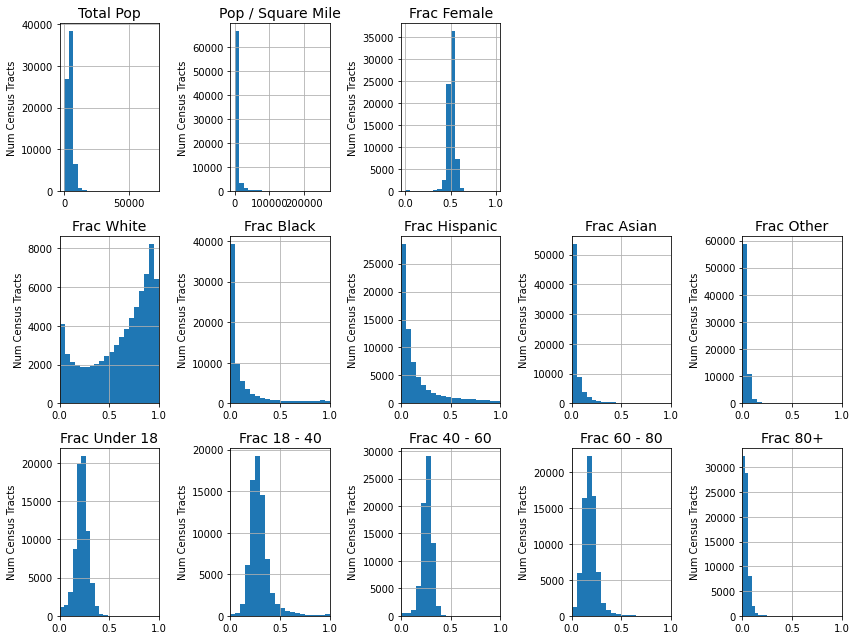

In [9]:
plt.figure(figsize=(12,9))

plt.subplot(3,5,1)
df['Total Pop'].hist(bins=20)
plt.title('Total Pop', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,2)
df['pop_density'].hist(bins=20)
plt.title('Pop / Square Mile', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,3)
df['frac_female'].hist(bins=20)
plt.title('Frac Female', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,6)
df['frac_white'].hist(bins=20)
plt.title('Frac White', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,7)
df['frac_black'].hist(bins=20)
plt.title('Frac Black', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,8)
df['frac_hispanic'].hist(bins=20)
plt.title('Frac Hispanic', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,9)
df['frac_asian'].hist(bins=20)
plt.title('Frac Asian', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,10)
df['frac_other'].hist(bins=20)
plt.title('Frac Other', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,11)
df['frac_under_18'].hist(bins=20)
plt.title('Frac Under 18', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,12)
df['frac_18_to_40'].hist(bins=20)
plt.title('Frac 18 - 40', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,13)
df['frac_40_to_60'].hist(bins=20)
plt.title('Frac 40 - 60', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,14)
df['frac_60_to_80'].hist(bins=20)
plt.title('Frac 60 - 80', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,15)
df['frac_80_plus'].hist(bins=20)
plt.title('Frac 80+', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])
plt.tight_layout()


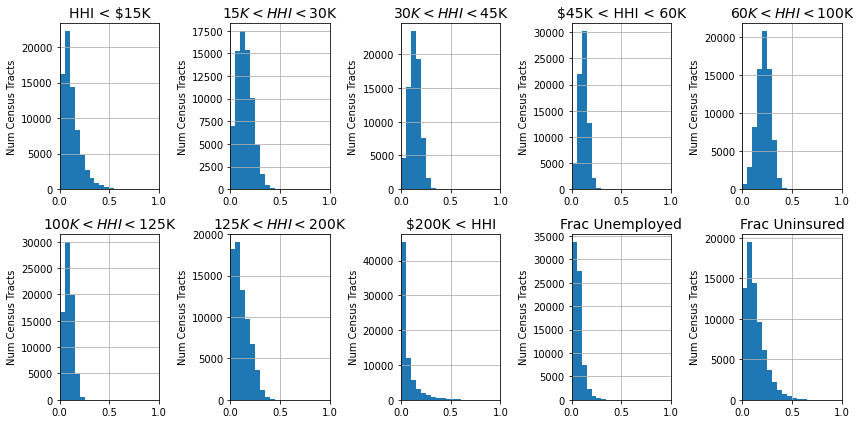

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
df['frac_lt_15k'].hist(bins=20)
plt.title('HHI < $15K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,2)
df['frac_15k_to_30k'].hist(bins=20)
plt.title('$15K < HHI < $30K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,3)
df['frac_30k_to_45k'].hist(bins=20)
plt.title('$30K < HHI < $45K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,4)
df['frac_45k_to_60k'].hist(bins=20)
plt.title('$45K < HHI < 60K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,5)
df['frac_60k_to_100k'].hist(bins=20)
plt.title('$60K < HHI < $100K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,6)
df['frac_100k_to_125k'].hist(bins=20)
plt.title('$100K < HHI < $125K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,7)
df['frac_125k_to_200k'].hist(bins=20)
plt.title('$125K < HHI < $200K', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,8)
df['frac_gt_200k'].hist(bins=20)
plt.title('$200K < HHI', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,9)
df['frac_unemployed'].hist(bins=20)
plt.title('Frac Unemployed', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,10)
df['frac_no_health_insurance'].hist(bins=20)
plt.title('Frac Uninsured', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.tight_layout()


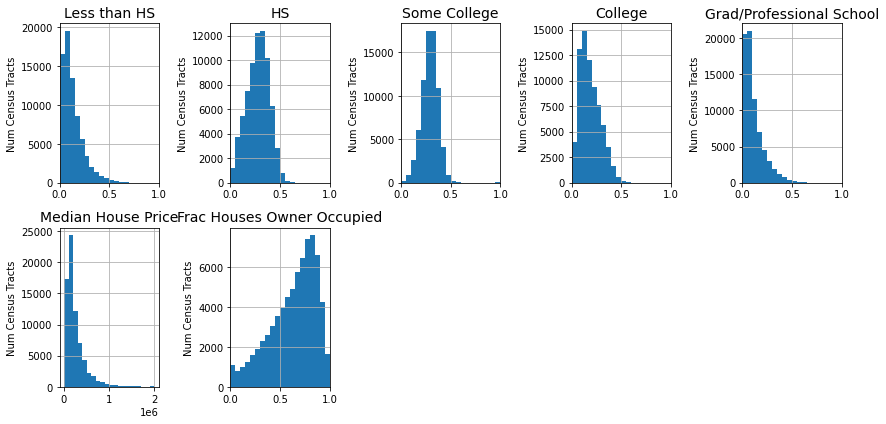

In [11]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
df['frac_lt_hs'].hist(bins=20)
plt.title('Less than HS', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,2)
df['frac_hs'].hist(bins=20)
plt.title('HS', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,3)
df['frac_some_college'].hist(bins=20)
plt.title('Some College', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,4)
df['frac_college'].hist(bins=20)
plt.title('College', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,5)
df['frac_graduate'].hist(bins=20)
plt.title('Grad/Professional School', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(2,5,6)
df['median_house_price'].hist(bins=20)
plt.title('Median House Price', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(2,5,7)
df['frac_houses_owner_occupied'].hist(bins=20)
plt.title('Frac Houses Owner Occupied', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])



plt.tight_layout()

In [13]:
# roll up to the zip code level level

In [14]:
df_crosswalk = pd.read_excel('TRACT_ZIP_032019.xlsx')

In [15]:
df_temp = pd.merge(df, df_crosswalk[['tract', 'zip', 'res_ratio']], left_on = 'GEOID', right_on = 'tract')
df_temp = df_temp[(df_temp['Total Pop'] > 0) & (df_temp['res_ratio'] > 0)]

In [16]:
weighted_sum_metrics = ['Total Pop', 'Square Miles']
weighted_average_metrics = [ 'frac_female',
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price', 
     #'food_insecurity', 'pct_snap', 'lila_tracts', 
     #'Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Pesticides', 'Tox. Release', 'Traffic'
]

def weighted_sum(group, column, weight):
    x = group[column]
    w = group[weight]
    return (x * w).sum()

def weighted_avg(group, column, weight):
    x = group[column]
    w = group[weight]
    return (x * w).sum() /  w.sum()

df_zip = pd.DataFrame(df_temp.zip.unique(), columns = ['zip'])

for column in weighted_sum_metrics:
    df_zip = pd.merge(df_zip, pd.DataFrame(df_temp.groupby('zip').apply(weighted_sum, column, 'res_ratio'), 
                               columns = [column]), on='zip')
    
for column in weighted_average_metrics:
    df_zip = pd.merge(df_zip, pd.DataFrame(df_temp.groupby('zip').apply(weighted_avg, column, 'res_ratio'), 
                               columns = [column]), on='zip')


In [17]:
df_zip['ZIP'] = df_zip.zip.astype(float)
df_zip = pd.merge(df_zip, df_temp.groupby('zip')['County Code'].agg(lambda x:x.value_counts().index[0]), on='zip', how='left')
df_zip = pd.merge(df_zip, df_temp.groupby('zip')['County'].agg(lambda x:x.value_counts().index[0]), on='zip', how='left')
df_zip = pd.merge(df_zip, df_temp.groupby('zip')['State Code'].agg(lambda x:x.value_counts().index[0]), on='zip', how='left')
df_zip = pd.merge(df_zip, df_temp.groupby('zip')['State'].agg(lambda x:x.value_counts().index[0]), on='zip', how='left')



df_zip['pop_density'] = df_zip['Total Pop'] / df_zip['Square Miles']

In [18]:
df_zip

,zip,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,frac_other,frac_under_18,...,frac_college,frac_graduate,frac_houses_owner_occupied,median_house_price,ZIP,County Code,County,State Code,State,pop_density
0,35077,13312.044222,127.413912,0.485921,0.929189,0.026698,0.027136,0.001521,0.015456,0.196370,...,0.071270,0.035665,0.739202,112574.944342,35077.0,043,Cullman,01,Alabama,104.478734
1,36360,17924.898899,175.135425,0.529733,0.694645,0.229911,0.037630,0.005896,0.031918,0.210774,...,0.106770,0.065136,0.672133,119588.117087,36360.0,045,Dale,01,Alabama,102.348790
2,36322,8495.879573,59.471573,0.531784,0.665353,0.160458,0.122620,0.016288,0.035281,0.205925,...,0.086277,0.038310,0.612702,103570.977201,36322.0,045,Dale,01,Alabama,142.856145
3,36362,5080.467874,65.880575,0.383419,0.693294,0.104561,0.124446,0.017919,0.059780,0.342141,...,0.270431,0.101521,0.000350,10049.516697,36362.0,045,Dale,01,Alabama,77.116326
4,36749,1157.866436,50.674536,0.512857,0.617758,0.357960,0.008020,0.000515,0.015747,0.214209,...,0.081686,0.089995,0.821930,99915.598451,36749.0,001,Autauga,01,Alabama,22.849078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34549,82410,1654.805629,791.120967,0.489475,0.929213,0.000735,0.037267,0.001263,0.031522,0.201381,...,0.160628,0.031841,0.701942,153276.303884,82410.0,003,Big Horn,56,Wyoming,2.091723
34550,82441,278.328054,108.163712,0.489138,0.893716,0.002214,0.076019,0.001112,0.026939,0.233648,...,0.151738,0.039067,0.714166,155928.664645,82441.0,003,Big Horn,56,Wyoming,2.573211
34551,82432,568.161220,275.111547,0.489497,0.931572,0.000637,0.034691,0.001273,0.031827,0.199236,...,0.161219,0.031360,0.701129,153100.000000,82432.0,003,Big Horn,56,Wyoming,2.065203
34552,82428,54.762527,26.516776,0.489497,0.931572,0.000637,0.034691,0.001273,0.031827,0.199236,...,0.161219,0.031360,0.701129,153100.000000,82428.0,003,Big Horn,56,Wyoming,2.065203


In [19]:
#df_pop = pd.read_csv('OpPop2018.csv')
df_pop = pd.read_csv('Optum_pop_2018_2.csv')
max_zips = max([len(x) for x in df_pop['ZIPCODE_5'].str.split('_')])

In [20]:
dfzzz = df_pop.ZIPCODE_5.str.split('_', max_zips, expand=True)
dfzzz = dfzzz.fillna(value=np.nan).astype(float)

dfzzz['num_zips'] = dfzzz.apply(lambda x: x.count(), axis=1).sort_values()

df_Optum_zips = pd.concat([df_pop['ZIPCODE_5'], dfzzz], axis=1)

In [21]:
df_Optum_zips.sort_values(by='num_zips')

,ZIPCODE_5,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,num_zips
0,965,965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12979,97101,97101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12980,20689,20689.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12982,36003,36003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12984,21036,21036.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19555,46802_46801_46850_46851_46852_46853_46854_4685...,46802.0,46801.0,46850.0,46851.0,46852.0,46853.0,46854.0,46855.0,46856.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
11832,24016_24011_24001_24002_24003_24004_24005_2400...,24016.0,24011.0,24001.0,24002.0,24003.0,24004.0,24005.0,24006.0,24007.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
590,79906_79918_88510_88511_88512_88513_88514_8851...,79906.0,79918.0,88510.0,88511.0,88512.0,88513.0,88514.0,88515.0,88517.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
8108,95814_94203_94207_94208_94209_94211_94229_9423...,95814.0,94203.0,94207.0,94208.0,94209.0,94211.0,94229.0,94234.0,94235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36


In [22]:
good_cols = ['ZIPCODE_5', 'Total Pop', 'Square Miles',  'frac_female', 'frac_white',
       'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
             'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
       'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
       'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price']

In [23]:
df_ans = pd.merge(df_zip, df_Optum_zips, left_on = 'zip', right_on=0)[good_cols]

In [24]:
for i in range(1,max_zips):
    df_temp = pd.merge(df_zip, df_Optum_zips, left_on = 'zip', right_on=i)[good_cols]
    df_temp2 = pd.merge(df_ans, df_temp, how='left', on='ZIPCODE_5')
    
    for col in good_cols[1:]:
        pop_x = df_temp2['Total Pop_x']
        pop_y = df_temp2['Total Pop_y']
        sm_x = df_temp2['Square Miles_x']
        sm_y = df_temp2['Square Miles_y']
        col_x = df_temp2[col + '_x']
        col_y = df_temp2[col + '_y']
        if col == 'Total Population':
            df_temp2['Total Population'] = (pop_x.fillna(0) + pop_y.fillna(0)).mask(pop_x.isna() & pop_y.isna())
        elif col == 'Square Miles':
            df_temp2['Square Miles'] = (sm_x.fillna(0) + sm_y.fillna(0)).mask(sm_x.isna() & sm_y.isna())
        else:
            df_temp2[col] = ((col_x.fillna(0) * pop_x.fillna(0) + col_y.fillna(0) * pop_y.fillna(0))/ (pop_x.fillna(0) + pop_y.fillna(0))).mask(pop_x.isna() & pop_y.isna()).mask(col_x.isna() & col_y.isna())
    
    df_ans = df_temp2[good_cols]

In [25]:
df_ans

,ZIPCODE_5,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,frac_other,frac_under_18,...,frac_gt_200k,frac_unemployed,frac_no_health_insurance,frac_lt_hs,frac_hs,frac_some_college,frac_college,frac_graduate,frac_houses_owner_occupied,median_house_price
0,35077_35070,13312.044222,127.413912,0.485921,0.929189,0.026698,0.027136,0.001521,0.015456,0.196370,...,0.027086,0.065445,0.169445,0.202972,0.339552,0.350541,0.071270,0.035665,0.739202,112574.944342
1,36360_36374_36361,15792.906261,223.697910,0.528516,0.681367,0.246865,0.034092,0.006096,0.031579,0.209789,...,0.027311,0.090842,0.158564,0.163780,0.332523,0.337511,0.104614,0.061572,0.661125,114406.781143
2,36322,8495.879573,59.471573,0.531784,0.665353,0.160458,0.122620,0.016288,0.035281,0.205925,...,0.009686,0.079475,0.271029,0.168162,0.367506,0.339745,0.086277,0.038310,0.612702,103570.977201
3,36362,5080.467874,65.880575,0.383419,0.693294,0.104561,0.124446,0.017919,0.059780,0.342141,...,0.013639,0.193126,0.000097,0.009143,0.128927,0.489979,0.270431,0.101521,0.000350,10049.516697
4,36758,1537.103278,59.153031,0.492298,0.675154,0.298852,0.008234,0.000000,0.017760,0.225616,...,0.020305,0.075757,0.164201,0.165551,0.414195,0.276893,0.074378,0.068983,0.776295,98086.983166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22005,82240_82218,10845.263857,975.581044,0.485918,0.854989,0.000885,0.110112,0.005880,0.028133,0.209238,...,0.024022,0.072251,0.170782,0.073758,0.285819,0.393413,0.151444,0.095567,0.732939,168164.662780
22006,82223_82212_82219,530.205824,733.200456,0.461262,0.890486,0.000000,0.065648,0.001425,0.042441,0.219470,...,0.003979,0.030175,0.170294,0.071987,0.284932,0.409007,0.151970,0.082104,0.814840,207260.625202
22007,82221_82244_82243_82217,284.311212,505.162629,0.494523,0.859155,0.000000,0.108372,0.000000,0.032473,0.174883,...,0.006731,0.025404,0.196980,0.097924,0.303885,0.386908,0.133049,0.078233,0.795192,206500.000000
22008,82410_82411_82434_82422,1252.978957,1021.092197,0.489340,0.917540,0.001221,0.050017,0.001212,0.030009,0.211995,...,0.009615,0.025473,0.271455,0.101836,0.292866,0.413231,0.157733,0.034334,0.706109,154335.240109


In [26]:
temp_1 = pd.merge(df_zip, df_Optum_zips, left_on = 'zip', right_on=0)[['ZIPCODE_5', 'County', 'County Code', 'State', 'State Code']]
temp_2 = pd.merge(df_zip, df_Optum_zips, left_on = 'zip', right_on=1)[['ZIPCODE_5', 'County', 'County Code', 'State', 'State Code']]
temp_3 = pd.merge(df_zip, df_Optum_zips, left_on = 'zip', right_on=2)[['ZIPCODE_5', 'County', 'County Code', 'State', 'State Code']]
df_ans = pd.merge(df_ans, temp_1.combine_first(temp_2).combine_first(temp_3), on='ZIPCODE_5', how='left')

df_ans['pop_density'] = df_ans['Total Pop'] / df_ans['Square Miles']

In [27]:
#double check that distributions aren't that different after all this rolling up

(0.0, 119984.96219966005)

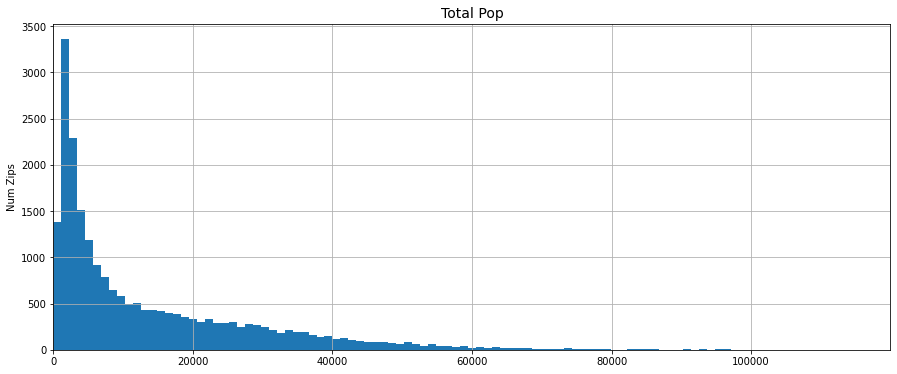

In [28]:
plt.figure(figsize=(15,6))

df_ans['Total Pop'].hist(bins=100)
plt.title('Total Pop', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,df_ans['Total Pop'].max()*1.05])

In [29]:
df_ans['Total Pop'].describe()

count     22010.000000
mean      13877.629265
std       15316.482786
min           1.222297
25%        2611.163042
50%        7369.602608
75%       20940.511500
max      114271.392571
Name: Total Pop, dtype: float64

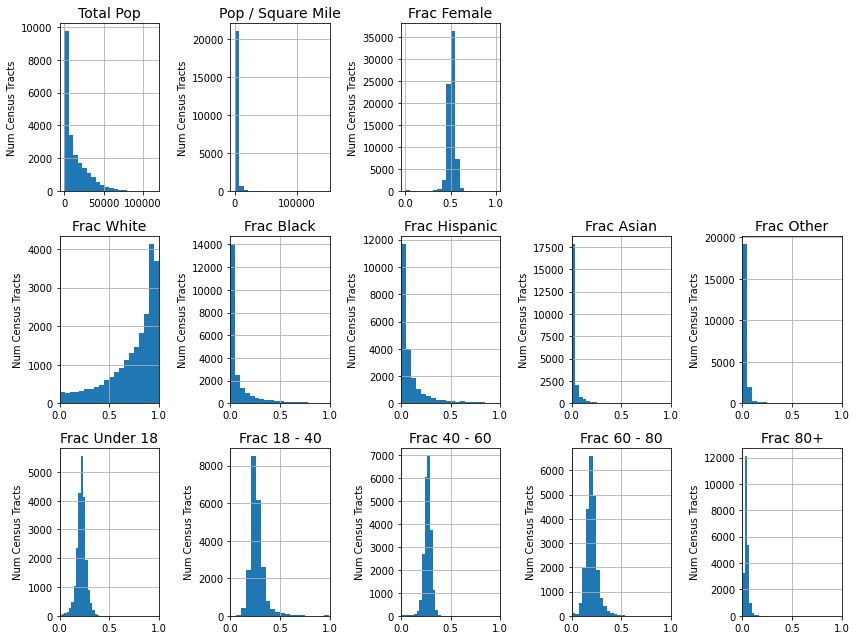

In [30]:
plt.figure(figsize=(12,9))

plt.subplot(3,5,1)
df_ans['Total Pop'].hist(bins=20)
plt.title('Total Pop', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,2)
df_ans['pop_density'].hist(bins=20)
plt.title('Pop / Square Mile', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,3)
df['frac_female'].hist(bins=20)
plt.title('Frac Female', fontsize=14)
plt.ylabel('Num Census Tracts')

plt.subplot(3,5,6)
df_ans['frac_white'].hist(bins=20)
plt.title('Frac White', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,7)
df_ans['frac_black'].hist(bins=20)
plt.title('Frac Black', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,8)
df_ans['frac_hispanic'].hist(bins=20)
plt.title('Frac Hispanic', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,9)
df_ans['frac_asian'].hist(bins=20)
plt.title('Frac Asian', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,10)
df_ans['frac_other'].hist(bins=20)
plt.title('Frac Other', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,11)
df_ans['frac_under_18'].hist(bins=20)
plt.title('Frac Under 18', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,12)
df_ans['frac_18_to_40'].hist(bins=20)
plt.title('Frac 18 - 40', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,13)
df_ans['frac_40_to_60'].hist(bins=20)
plt.title('Frac 40 - 60', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,14)
df_ans['frac_60_to_80'].hist(bins=20)
plt.title('Frac 60 - 80', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])

plt.subplot(3,5,15)
df_ans['frac_80_plus'].hist(bins=20)
plt.title('Frac 80+', fontsize=14)
plt.ylabel('Num Census Tracts')
plt.xlim([0,1])
plt.tight_layout()


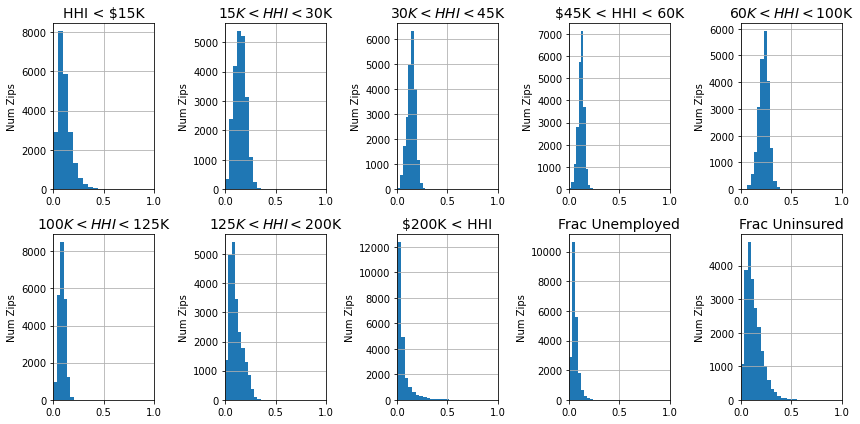

In [31]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
df_ans['frac_lt_15k'].hist(bins=20)
plt.title('HHI < $15K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,2)
df_ans['frac_15k_to_30k'].hist(bins=20)
plt.title('$15K < HHI < $30K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,3)
df_ans['frac_30k_to_45k'].hist(bins=20)
plt.title('$30K < HHI < $45K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,4)
df_ans['frac_45k_to_60k'].hist(bins=20)
plt.title('$45K < HHI < 60K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,5)
df_ans['frac_60k_to_100k'].hist(bins=20)
plt.title('$60K < HHI < $100K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,6)
df_ans['frac_100k_to_125k'].hist(bins=20)
plt.title('$100K < HHI < $125K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,7)
df_ans['frac_125k_to_200k'].hist(bins=20)
plt.title('$125K < HHI < $200K', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,8)
df_ans['frac_gt_200k'].hist(bins=20)
plt.title('$200K < HHI', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,9)
df_ans['frac_unemployed'].hist(bins=20)
plt.title('Frac Unemployed', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,10)
df_ans['frac_no_health_insurance'].hist(bins=20)
plt.title('Frac Uninsured', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.tight_layout()


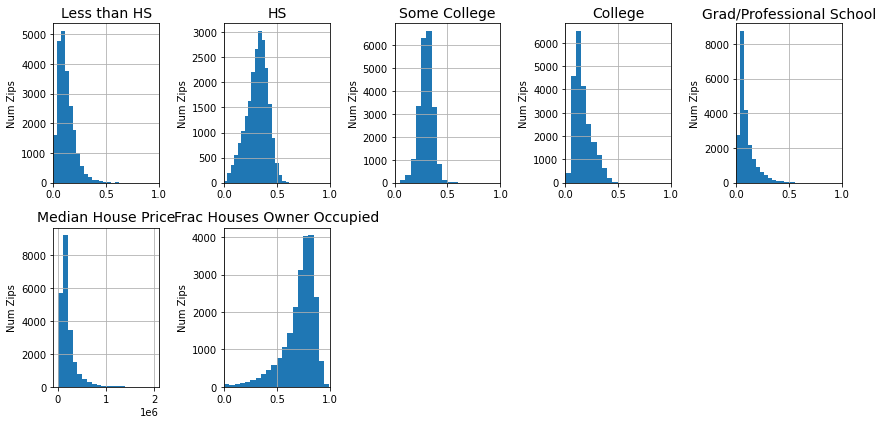

In [32]:
plt.figure(figsize=(12,6))

plt.subplot(2,5,1)
df_ans['frac_lt_hs'].hist(bins=20)
plt.title('Less than HS', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,2)
df_ans['frac_hs'].hist(bins=20)
plt.title('HS', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,3)
df_ans['frac_some_college'].hist(bins=20)
plt.title('Some College', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,4)
df_ans['frac_college'].hist(bins=20)
plt.title('College', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,5)
df_ans['frac_graduate'].hist(bins=20)
plt.title('Grad/Professional School', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])

plt.subplot(2,5,6)
df_ans['median_house_price'].hist(bins=20)
plt.title('Median House Price', fontsize=14)
plt.ylabel('Num Zips')

plt.subplot(2,5,7)
df_ans['frac_houses_owner_occupied'].hist(bins=20)
plt.title('Frac Houses Owner Occupied', fontsize=14)
plt.ylabel('Num Zips')
plt.xlim([0,1])


plt.tight_layout()

In [33]:
#put it together

In [34]:
df_ans = pd.merge(df_ans, df_pop, on='ZIPCODE_5', how = 'left')

In [35]:
df_ans.columns

Index(['ZIPCODE_5', 'Total Pop', 'Square Miles', 'frac_female', 'frac_white',
       'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
       'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80',
       'frac_80_plus', 'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k',
       'frac_45k_to_60k', 'frac_60k_to_100k', 'frac_100k_to_125k',
       'frac_125k_to_200k', 'frac_gt_200k', 'frac_unemployed',
       'frac_no_health_insurance', 'frac_lt_hs', 'frac_hs',
       'frac_some_college', 'frac_college', 'frac_graduate',
       'frac_houses_owner_occupied', 'median_house_price', 'County',
       'County Code', 'State', 'State Code', 'pop_density', 'pop_june1',
       'pop_wholetime', 'pop_oneday'],
      dtype='object')

In [181]:
#we have 3 different definitions of population: patients covered in Optum onone specific day in 2018, 
#patients covered for the whole year continuously, and patients covered at any point during the year at all.

#this is where you pick which one you care about

df_ans['count'] = df_ans['pop_wholetime']

In [182]:
df_ans.sort_values(by = 'count')

,ZIPCODE_5,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,frac_other,frac_under_18,...,County,County Code,State,State Code,pop_density,pop_june1,pop_wholetime,pop_oneday,count,frac_pop_included_in_Optum
3134,19716,8.542504,0.004316,0.518677,0.733257,0.103808,0.065368,0.052527,0.045039,0.075719,...,New Castle,003,Delaware,10,1979.465001,0,0,0,0,0.000000
525,99702,3082.045756,436.162109,0.401961,0.733713,0.050917,0.138836,0.039216,0.037318,0.284314,...,Fairbanks North Star,090,Alaska,02,7.066285,0,0,1,0,0.000324
12937,10996_10997,6365.015385,22.540338,0.350517,0.704331,0.071632,0.091863,0.050652,0.081523,0.254608,...,Orange,071,New York,36,282.383310,4,0,9,0,0.001414
9645,48825,3417.000000,0.121000,0.576236,0.713199,0.104185,0.031021,0.094235,0.057360,0.025754,...,Ingham,065,Michigan,26,28239.669421,1,0,3,0,0.000878
20724,98315,6194.954168,10.861702,0.329545,0.677083,0.024937,0.173453,0.037405,0.087121,0.269571,...,Kitsap,035,Washington,53,570.348366,1,0,3,0,0.000484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,77494,113586.823194,46.561340,0.508936,0.507109,0.080040,0.205904,0.181055,0.025891,0.292338,...,Fort Bend,157,Texas,48,2439.509333,10047,7105,13819,7105,0.121660
2786,80134,65430.539738,63.275941,0.498660,0.808092,0.017853,0.087051,0.049464,0.037540,0.279442,...,Douglas,035,Colorado,08,1034.050836,9876,7132,12870,7132,0.196697
18440,78660_78691,85040.251550,50.347588,0.511158,0.383772,0.127912,0.360935,0.094567,0.032814,0.275954,...,Travis,453,Texas,48,1689.063065,10539,7256,13754,7256,0.161735
3725,32162,53630.627613,30.715216,0.545799,0.947690,0.009502,0.023082,0.014583,0.005144,0.027140,...,Sumter,119,Florida,12,1746.060586,11165,10175,12449,10175,0.232125


In [183]:
df_ans.ZIPCODE_5.nunique()

22010

In [184]:
df_ans['count'].sum() / df_ans['Total Pop'].sum()*100

3.931055447567526

In [185]:
df_ans.groupby('State').size()

State
Alabama                  488
Alaska                    50
Arizona                  287
Arkansas                 324
California              1376
Colorado                 319
Connecticut              244
Delaware                  52
District of Columbia      22
Florida                  895
Georgia                  590
Hawaii                    66
Idaho                    145
Illinois                 880
Indiana                  555
Iowa                     456
Kansas                   352
Kentucky                 443
Louisiana                380
Maine                    262
Maryland                 337
Massachusetts            454
Michigan                 789
Minnesota                534
Mississippi              307
Missouri                 602
Montana                  132
Nebraska                 254
Nevada                   114
New Hampshire            186
New Jersey               521
New Mexico               151
New York                1249
North Carolina           666
North Da

In [186]:
df_ans['frac_pop_included_in_Optum'] = df_ans['count'] / df_ans['Total Pop']

In [187]:
df_ans.frac_pop_included_in_Optum.describe()

count    22010.000000
mean         0.049256
std          0.385392
min          0.000000
25%          0.018002
50%          0.032249
75%          0.052453
max         43.068557
Name: frac_pop_included_in_Optum, dtype: float64

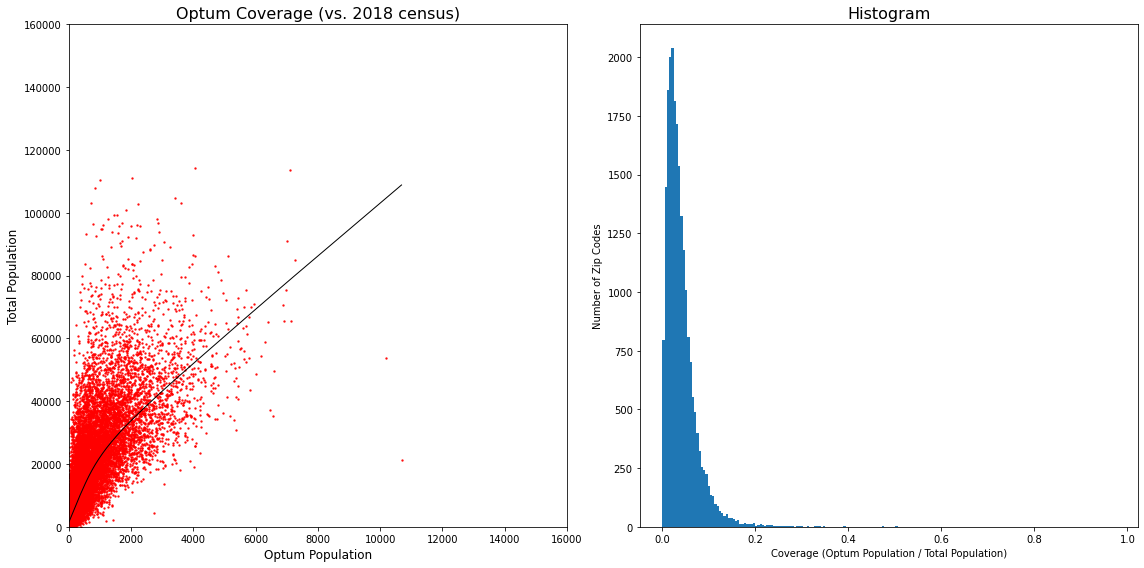

In [188]:
df_plot = df_ans.copy()

plt.subplots(1,2,figsize=(16,8))

plt.subplot(1,2,1)
#plt.plot(df_plot['count']/1000, df_plot['Total Pop']/1000, '.', alpha = 0.25)
plt.xlim([0,16000])
plt.ylim([0,160000])
sns.regplot(x = 'count', y = 'Total Pop', data = df_plot, lowess=True, scatter_kws={'color':'r', 's':2}, line_kws={'color':'black', 'linewidth':'1'})
plt.xlabel('Optum Population', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.title('Optum Coverage (vs. 2018 census)', fontsize=16)

plt.subplot(1,2,2)

plt.hist(df_plot[df_plot.frac_pop_included_in_Optum < 1].frac_pop_included_in_Optum, bins=200)
plt.title('Histogram', fontsize=16)
plt.xlabel('Coverage (Optum Population / Total Population)')
plt.ylabel('Number of Zip Codes')

plt.tight_layout()
plt.savefig('coverage.jpg')


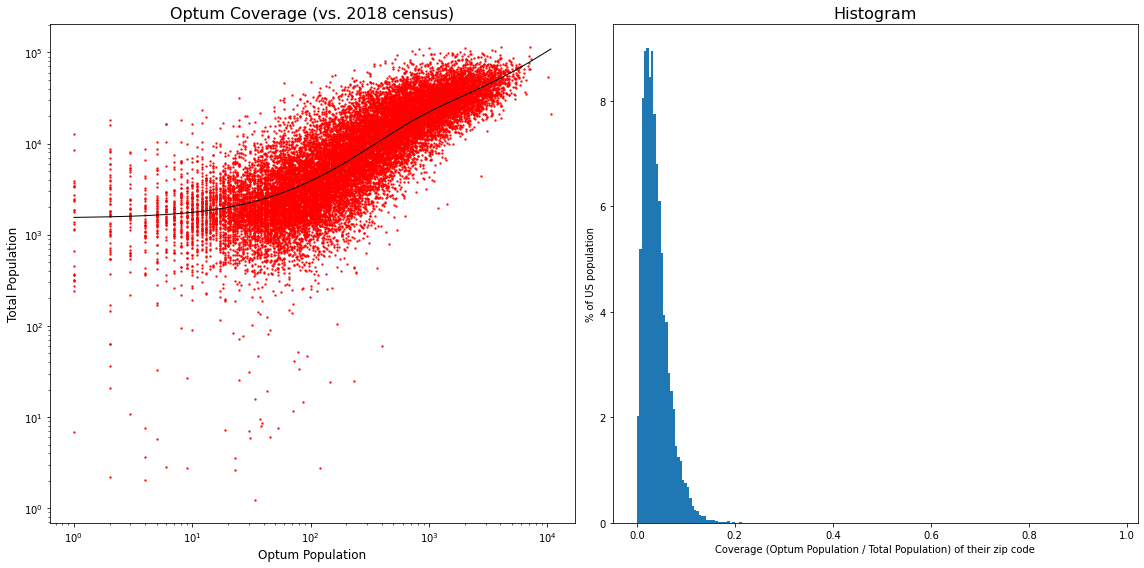

In [189]:
df_plot = df_ans.copy()

plt.subplots(1,2,figsize=(16,8))

plt.subplot(1,2,1)
#plt.plot(df_plot['count']/1000, df_plot['Total Pop']/1000, '.', alpha = 0.25)
#plt.xlim([0,16000])
#plt.ylim([0,160000])
sns.regplot(x = 'count', y = 'Total Pop', data = df_plot[df_plot['count'] > 0], lowess=True, scatter_kws={'color':'r', 's':2}, line_kws={'color':'black', 'linewidth':'1'})
plt.xlabel('Optum Population', fontsize=12)
plt.ylabel('Total Population', fontsize=12)
plt.title('Optum Coverage (vs. 2018 census)', fontsize=16)
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,2)

df_temp = df_plot[df_plot.frac_pop_included_in_Optum < 1].copy()
plt.hist(df_temp.frac_pop_included_in_Optum, bins=200,
        weights=100 * df_temp['Total Pop'] / df_temp['Total Pop'].sum())
plt.title('Histogram', fontsize=16)
plt.xlabel('Coverage (Optum Population / Total Population) of their zip code')
plt.ylabel('% of US population')

plt.tight_layout()
plt.savefig('coverage2.jpg')


In [190]:
df_ans.frac_pop_included_in_Optum.describe()

count    22010.000000
mean         0.049256
std          0.385392
min          0.000000
25%          0.018002
50%          0.032249
75%          0.052453
max         43.068557
Name: frac_pop_included_in_Optum, dtype: float64

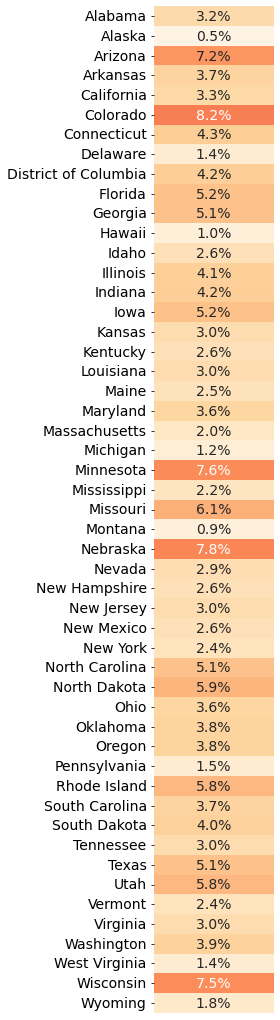

In [191]:
plt.figure(figsize=(4,17 * 3.5/7.5 * 1.8 ))

df_temp = pd.DataFrame([])
df_temp = pd.DataFrame(np.round(100*(df_ans.groupby('State')['count'].sum() / df_ans.groupby('State')['Total Pop'].sum()),1)).rename(columns={0:'Optum Rep'})
df_temp['Total Pop'] = df_ans.groupby('State')['Total Pop'].sum()

df_temp['err'] = 196 * (df_temp['Optum Rep']/100 * (1-df_temp['Optum Rep']/100) / df_temp['Total Pop']) ** (1/2)
df_temp['annot'] = ['{:,.1f}'.format(x) + '%' for x in df_temp['Optum Rep']]


b = sns.heatmap(df_temp[['Optum Rep']],   cmap = 'OrRd', 
         vmin=0, vmax=15,  cbar=False, robust=True,fmt = '', annot = df_temp[['annot']],
                annot_kws={'size':14})
b.set_yticklabels(b.get_yticklabels(), size = 14)
b.set_xticks([])

plt.ylabel('')
plt.xlabel('')


plt.tight_layout()
plt.savefig('list_states.jpg', dpi = 200)

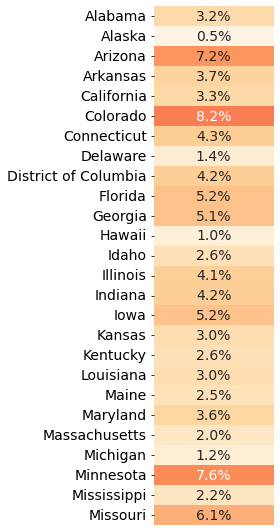

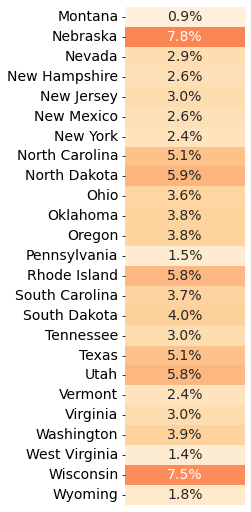

In [192]:
plt.figure(figsize=(4,15/2))

df_temp = pd.DataFrame([])
df_temp = pd.DataFrame(np.round(100*(df_ans.groupby('State')['count'].sum() / df_ans.groupby('State')['Total Pop'].sum()),1)).rename(columns={0:'Optum Rep'})
df_temp['Total Pop'] = df_ans.groupby('State')['Total Pop'].sum()

df_temp['err'] = 196 * (df_temp['Optum Rep']/100 * (1-df_temp['Optum Rep']/100) / df_temp['Total Pop']) ** (1/2)
df_temp['annot'] = ['{:,.1f}'.format(x) + '%' for x in df_temp['Optum Rep']]


b = sns.heatmap(df_temp.iloc[:26,:][['Optum Rep']],   cmap = 'OrRd', 
         vmin=0, vmax=15,  cbar=False, robust=True,fmt = '', annot = df_temp.iloc[:26,:][['annot']],
                annot_kws={'size':14})
b.set_yticklabels(b.get_yticklabels(), size = 14)
b.set_xticks([])

plt.ylabel('')
plt.xlabel('')


plt.tight_layout()
plt.savefig('list_states_1.jpg', dpi = 200)



plt.figure(figsize=(3.6,15/2 * 25/26))


b = sns.heatmap(df_temp.iloc[26:,:][['Optum Rep']],   cmap = 'OrRd', 
         vmin=0, vmax=15,  cbar=False, robust=True,fmt = '', annot = df_temp.iloc[26:,:][['annot']],
                annot_kws={'size':14})
b.set_yticklabels(b.get_yticklabels(), size = 14)
b.set_xticks([])

plt.ylabel('')
plt.xlabel('')


plt.tight_layout()
plt.savefig('list_states_2.jpg', dpi = 200)

In [193]:
df_plot['State'].nunique()

51

In [194]:
#Now fit a model that says how Optum coverage correlates with demographics

In [195]:
# Model 1: unweighted, but careful about outliers

In [196]:
df_run = df_ans[(df_ans['Total Pop'] >= 1000)].copy()

for col in ['Total Pop', 'pop_density', 'frac_female', 'frac_white', 'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 'frac_under_18',
       'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
       'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
       'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'median_house_price', 'frac_pop_included_in_Optum']:
    df_run[col] = df_run[col].clip(upper = np.percentile(df_run[col],99))
    
    
df_run['Total Pop 100k'] = df_run['Total Pop'] / 100000
df_run['Pop Density 1k'] = df_run['pop_density'] / 1000
df_run['Median House Price 100k'] = df_run['median_house_price'] / 100000
    


In [197]:
# unadjusted correlations

In [198]:
features = [ 'Total Pop 100k', 'Pop Density 1k', 'frac_female', 'frac_white', 'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 'frac_under_18',
            'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
            'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance', 'frac_lt_hs',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'Median House Price 100k']
            
df_run[features].mean()

Total Pop 100k                0.144503
Pop Density 1k                1.469855
frac_female                   0.502500
frac_white                    0.732356
frac_black                    0.094374
frac_hispanic                 0.109437
frac_asian                    0.027832
frac_other                    0.031101
frac_under_18                 0.219761
frac_18_to_40                 0.269171
frac_40_to_60                 0.267549
frac_60_to_80                 0.200077
frac_80_plus                  0.041063
frac_lt_15k                   0.111732
frac_15k_to_30k               0.147342
frac_30k_to_45k               0.139525
frac_45k_to_60k               0.118798
frac_60k_to_100k              0.226470
frac_100k_to_125k             0.085990
frac_125k_to_200k             0.108350
frac_gt_200k                  0.057583
frac_unemployed               0.058425
frac_no_health_insurance      0.127269
frac_lt_hs                    0.121664
frac_hs                       0.312186
frac_some_college        

In [199]:
df_run.frac_pop_included_in_Optum.clip(upper=0.2).describe()

count    20914.000000
mean         0.038109
std          0.028159
min          0.000000
25%          0.017710
50%          0.031506
75%          0.050730
max          0.144799
Name: frac_pop_included_in_Optum, dtype: float64

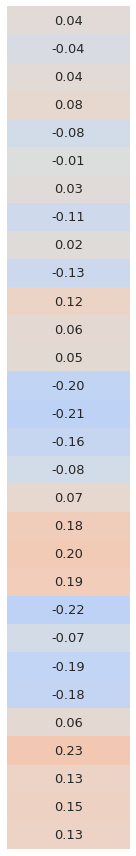

In [200]:
plt.figure(figsize=(2,24/2))

#df_temp = df_run.copy()
#df_temp = df_plot[df_plot.State == state].copy()

#df_temp['Optum_representation'] = df_temp.frac_pop_included_in_Optum#.clip(upper=0.2)#.clip(upper = np.percentile(df_temp.frac_pop_included_in_Optum,99))

features = ['Total Pop', 'pop_density','frac_female', 
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price'
     #'food_insecurity', 'pct_snap', 'lila_tracts'
           ]



corr_mat =  df_run[['frac_pop_included_in_Optum'] + features].corr()

corr_mat = corr_mat[corr_mat.index.isin(features)][['frac_pop_included_in_Optum']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = corr_mat, fmt = '.2f',
                annot_kws={'size':13})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('temp.jpg')


In [201]:
#full multivariable model

In [202]:
features = [ 'Total Pop 100k', 'Pop Density 1k','frac_female',  'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 
            'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
       'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'Median House Price 100k'
       #,'food_insecurity', 'pct_snap', 'lila_tracts'
           ]

features = []

X = sm.add_constant(df_run[features] ).fillna(0)

X = pd.concat([X, pd.get_dummies(df_run['State']).iloc[:,:-1]], axis=1)
y = df_run['frac_pop_included_in_Optum'] * 100

est = sm.OLS(y, X).fit() #maxiter=50000, method='nm') # weights = df_plot['Total Pop']
est.summary2()



<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:              OLS                        Adj. R-squared:     0.346     
Dependent Variable: frac_pop_included_in_Optum AIC:                93818.3410
Date:               2022-09-16 16:34           BIC:                94223.6979
No. Observations:   20914                      Log-Likelihood:     -46858.   
Df Model:           50                         F-statistic:        222.5     
Df Residuals:       20863                      Prob (F-statistic): 0.00      
R-squared:          0.348                      Scale:              5.1841    
------------------------------------------------------------------------------
                           Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------------------
const                      2.0795    0.3321   6.2614  0.0000   1.4285   2.7305
Alabama                    1.2754    0.3480   3.6649  0.0002   0.5933   1.9575
Alaska                    -1.6345    0.4697  -3.4799  0.0005  -2.5551  -0.7139
Arizona                    4.7989    0.3596  13.3464  0.0000   4.0941   5.5037
Arkansas                   1.8615    0.3567   5.2186  0.0000   1.1623   2.5607
California                 1.3214    0.3380   3.9101  0.0001   0.6590   1.9839
Colorado                   5.2421    0.3573  14.6695  0.0000   4.5417   5.9425
Connecticut                2.7247    0.3631   7.5047  0.0000   2.0130   3.4363
Delaware                  -0.6765    0.4604  -1.4694  0.1417  -1.5789   0.2259
District of Columbia       2.3809    0.5882   4.0480  0.0001   1.2280   3.5337
Florida                    2.8635    0.3407   8.4038  0.0000   2.1956   3.5314
Georgia                    3.6303    0.3452  10.5166  0.0000   2.9537   4.3069
Hawaii                    -1.3538    0.4419  -3.0635  0.0022  -2.2200  -0.4876
Idaho                     -0.2806    0.3879  -0.7232  0.4695  -1.0409   0.4798
Illinois                   2.7195    0.3414   7.9649  0.0000   2.0503   3.3887
Indiana                    2.0931    0.3463   6.0434  0.0000   1.4142   2.7720
Iowa                       3.1088    0.3513   8.8502  0.0000   2.4203   3.7973
Kansas                     0.7711    0.3572   2.1588  0.0309   0.0710   1.4712
Kentucky                   0.3896    0.3511   1.1098  0.2671  -0.2985   1.0778
Louisiana                  0.8594    0.3527   2.4363  0.0148   0.1680   1.5508
Maine                      0.5112    0.3636   1.4061  0.1597  -0.2014   1.2238
Maryland                   1.8648    0.3552   5.2502  0.0000   1.1686   2.5610
Massachusetts             -0.0888    0.3492  -0.2545  0.7991  -0.7733   0.5956
Michigan                  -0.9463    0.3421  -2.7662  0.0057  -1.6168  -0.2758
Minnesota                  5.4755    0.3471  15.7734  0.0000   4.7951   6.1560
Mississippi               -0.0082    0.3571  -0.0230  0.9817  -0.7082   0.6917
Missouri                   3.9068    0.3459  11.2950  0.0000   3.2289   4.5848
Montana                   -1.1345    0.3952  -2.8707  0.0041  -1.9091  -0.3599
Nebraska                   5.4372    0.3693  14.7247  0.0000   4.7134   6.1610
Nevada                     0.7531    0.3962   1.9006  0.0574  -0.0236   1.5297
New Hampshire              0.6329    0.3727   1.6979  0.0895  -0.0977   1.3635
New Jersey                 0.8709    0.3468   2.5112  0.0120   0.1911   1.5508
New Mexico                 0.5377    0.3896   1.3801  0.1676  -0.2259   1.3013
New York                   0.5280    0.3386   1.5596  0.1189  -0.1356   1.1916
North Carolina             2.7592    0.3438   8.0259  0.0000   2.0853   3.4331
North Dakota               3.5606    0.4319   8.2442  0.0000   2.7141   4.4072
Ohio                       1.1325    0.3408   3.3230  0.0009   0.4645   1.8005
Oklahoma                   1.0247    0.3528   2.9047  0.0037   0.3332   1.7163
Oregon                     1.0973

In [203]:
results_as_html = est.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp[1:26]

,coef,std err,t,P>|t|,[0.025,0.975]
Alabama,1.2754,0.348,3.665,0.000,0.593,1.957
Alaska,-1.6345,0.470,-3.480,0.001,-2.555,-0.714
Arizona,4.7989,0.360,13.346,0.000,4.094,5.504
Arkansas,1.8615,0.357,5.219,0.000,1.162,2.561
California,1.3214,0.338,3.910,0.000,0.659,1.984
Colorado,5.2421,0.357,14.670,0.000,4.542,5.943
Connecticut,2.7247,0.363,7.505,0.000,2.013,3.436
Delaware,-0.6765,0.460,-1.469,0.142,-1.579,0.226
District of Columbia,2.3809,0.588,4.048,0.000,1.228,3.534
Florida,2.8635,0.341,8.404,0.000,2.196,3.531


In [204]:
# partial R^2s

In [205]:
features = ['Total Pop 100k', 'Pop Density 1k','frac_female', 
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
    'Median House Price 100k'
     #'food_insecurity', 'pct_snap', 'lila_tracts'
           ]
df_partial_corrs = pd.DataFrame([], columns = ['coef', 'std err', 'p', 'partial corr'])
i=0

for feature in features:
    
    print(feature)


    X = sm.add_constant(pd.get_dummies(df_run['State']).iloc[:,:-1])
    y = df_run['frac_pop_included_in_Optum']*100

    est = sm.OLS(y, X).fit() 
    resid_Optum = est.resid


    y = df_run[feature]

    est = sm.OLS(y, X).fit() 
    resid_feature = est.resid

    X = sm.add_constant(df_run[feature])
    y = resid_Optum

    est = sm.OLS(y, X).fit() 

    results_as_html = est.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]

    df_partial_corrs.loc[i] = list(temp.loc[feature,['coef', 'std err', 'P>|t|']]) + list([np.corrcoef(resid_Optum, resid_feature)[0,1]])
    i += 1


Total Pop 100k
Pop Density 1k
frac_female
frac_white
frac_black
frac_hispanic
frac_asian
frac_other
frac_under_18
frac_18_to_40
frac_40_to_60
frac_60_to_80
frac_80_plus
frac_lt_15k
frac_15k_to_30k
frac_30k_to_45k
frac_45k_to_60k
frac_60k_to_100k
frac_100k_to_125k
frac_125k_to_200k
frac_gt_200k
frac_unemployed
frac_no_health_insurance
frac_lt_hs
frac_hs
frac_some_college
frac_college
frac_graduate
frac_houses_owner_occupied
Median House Price 100k


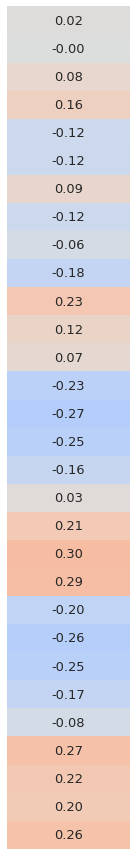

In [206]:
plt.figure(figsize=(2,24/2))


corr_mat =  df_partial_corrs[['partial corr']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = corr_mat, fmt = '.2f',
                annot_kws={'size':13})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('temp.jpg')


In [207]:
#Model 2: population weighting

In [208]:
df_run = df_ans.copy()

df_run['Total Pop 100k'] = df_run['Total Pop'] / 1000
df_run['Pop Density 1k'] = df_run['pop_density'] / 10
df_run['Log Pop Density'] = np.log10(df_run['pop_density']) / 100
df_run['Median House Price 100k'] = df_run['median_house_price'] / 1000
    

In [209]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

In [210]:
features = [ 'Total Pop 100k', 'Log Pop Density',
            #'Pop Density 1k', 
            'frac_female', 
            'frac_white', 'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 'frac_under_18',
            'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
            'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance', 'frac_lt_hs',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'Median House Price 100k']

df_corr = pd.DataFrame([], columns = ['corr'])

i = 0
for feature in features:
    cc = corr(df_run[feature], df_run['frac_pop_included_in_Optum'], df_run['Total Pop 100k'])
    df_corr.loc[i] = cc
    i += 1

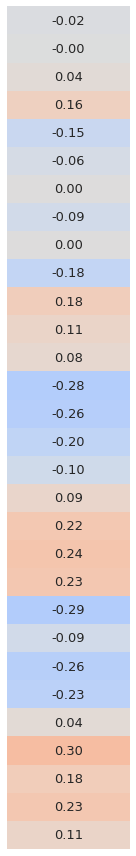

In [211]:
plt.figure(figsize=(2,24/2))

sns.heatmap(df_corr,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = df_corr, fmt = '.2f',
                annot_kws={'size':13})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('temp.jpg')


In [212]:
#full multivariable model

In [213]:
features = [ 'Total Pop 100k', 'Log Pop Density',
            #'Pop Density 1k',
            'frac_female', 
            'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 
            'frac_18_to_40', 'frac_40_to_60',  'frac_60_to_80', 'frac_80_plus',
             'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
        'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance', 
        'frac_hs',  'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'Median House Price 100k']

#features = []

X = sm.add_constant(df_run[features] ).fillna(0)

X = pd.concat([X, pd.get_dummies(df_run['State']).iloc[:,:-1]], axis=1)
y = df_run['frac_pop_included_in_Optum'] 

est = sm.WLS(y, X, weights = df_run['Total Pop 100k']).fit() #maxiter=50000, method='nm') # weights = df_plot['Total Pop']
est.summary2()



<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Weighted least squares
==============================================================================
Model:              WLS                        Adj. R-squared:     0.485      
Dependent Variable: frac_pop_included_in_Optum AIC:                -94794.1929
Date:               2022-09-16 16:34           BIC:                -94178.2504
No. Observations:   22010                      Log-Likelihood:     47474.     
Df Model:           76                         F-statistic:        273.5      
Df Residuals:       21933                      Prob (F-statistic): 0.00       
R-squared:          0.487                      Scale:              0.0055924  
------------------------------------------------------------------------------
                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
const                         -0.0282   0.0082  -3.4461 0.0006 -0.0443 -0.0122
Total Pop 100k                -0.0000   0.0000  -4.9128 0.0000 -0.0001 -0.0000
Log Pop Density                0.3986   0.0307  12.9993 0.0000  0.3385  0.4587
frac_female                    0.0395   0.0072   5.4907 0.0000  0.0254  0.0537
frac_black                    -0.0061   0.0012  -4.8524 0.0000 -0.0085 -0.0036
frac_hispanic                  0.0085   0.0016   5.3701 0.0000  0.0054  0.0116
frac_asian                    -0.0068   0.0023  -2.9892 0.0028 -0.0112 -0.0023
frac_other                    -0.0351   0.0047  -7.4065 0.0000 -0.0444 -0.0258
frac_18_to_40                 -0.0228   0.0052  -4.4137 0.0000 -0.0329 -0.0127
frac_40_to_60                  0.0599   0.0074   8.1179 0.0000  0.0454  0.0744
frac_60_to_80                  0.0286   0.0057   5.0497 0.0000  0.0175  0.0398
frac_80_plus                   0.0706   0.0120   5.8785 0.0000  0.0470  0.0941
frac_15k_to_30k               -0.0190   0.0077  -2.4874 0.0129 -0.0340 -0.0040
frac_30k_to_45k               -0.0094   0.0073  -1.2989 0.1940 -0.0237  0.0048
frac_45k_to_60k               -0.0104   0.0077  -1.3466 0.1781 -0.0256  0.0047
frac_60k_to_100k              -0.0020   0.0055  -0.3687 0.7123 -0.0129  0.0088
frac_100k_to_125k              0.0158   0.0092   1.7160 0.0862 -0.0023  0.0339
frac_125k_to_200k              0.0192   0.0067   2.8736 0.0041  0.0061  0.0323
frac_gt_200k                   0.0289   0.0071   4.0962 0.0000  0.0151  0.0428
frac_unemployed               -0.0060   0.0076  -0.7827 0.4338 -0.0210  0.0090
frac_no_health_insurance      -0.0419   0.0039 -10.6283 0.0000 -0.0496 -0.0341
frac_hs                        0.0358   0.0057   6.2907 0.0000  0.0246  0.0469
frac_some_college             -0.0017   0.0044  -0.3765 0.7065 -0.0104  0.0070
frac_college                   0.0468   0.0057   8.2096 0.0000  0.0356  0.0580
frac_graduate                 -0.0054   0.0058  -0.9282 0.3533 -0.0167  0.0060
frac_houses_owner_occupied    -0.0018   0.0020  -0.9172 0.3590 -0.0057  0.0021
Median House Price 100k        0.0000   0.0000   2.3312 0.0198  0.0000  0.0000
Alabama                        0.0092   0.0036   2.5987 0.0094  0.0023  0.0162
Alaska                        -0.0121   0.0046  -2.6289 0.0086 -0.0212 -0.0031
Arizona                        0.0454   0.0035  12.9656 0.0000  0.0385  0.0522
Arkansas                       0.0146   0.0037   3.9654 0.0001  0.0074  0.0218
California                     0.0003   0.0034   0.0902 0.9281 -0.0064  0.0070
Colorado                       0.0493   0.0035  14.0287 0.0000  0.0425  0.0562
Connecticut                    0.0027   0.0036   0.7533 0.4513 -0.0044  0.0099
Delaware                      -0.0203   0.0042  -4.8233 0.0000 -0.0285 -0.0120
District of Columbia           0.0083   0.0046   1.8161 0.0694 -0.0007  0.0173
Florida                        0.0215   0.0034   6.2810 0.0000  0.0148  0.0282
Georgia                        0.0285   0.0035   8.2317 0.0000  0.0217  0.0352
Hawaii                   

In [214]:
results_as_html = est.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp[1:26]

,coef,std err,t,P>|t|,[0.025,0.975]
Total Pop 100k,-0.000046,0.000009,-4.913,0.000,-0.000064,-0.000028
Log Pop Density,0.398600,0.031000,12.999,0.000,0.338000,0.459000
frac_female,0.039500,0.007000,5.491,0.000,0.025000,0.054000
frac_black,-0.006100,0.001000,-4.852,0.000,-0.009000,-0.004000
frac_hispanic,0.008500,0.002000,5.370,0.000,0.005000,0.012000
frac_asian,-0.006800,0.002000,-2.989,0.003,-0.011000,-0.002000
frac_other,-0.035100,0.005000,-7.407,0.000,-0.044000,-0.026000
frac_18_to_40,-0.022800,0.005000,-4.414,0.000,-0.033000,-0.013000
frac_40_to_60,0.059900,0.007000,8.118,0.000,0.045000,0.074000
frac_60_to_80,0.028600,0.006000,5.050,0.000,0.018000,0.040000


In [215]:
# partial R^2s

In [216]:
features = ['Total Pop 100k', 'Log Pop Density',
          #  'Pop Density 1k',
            'frac_female', 
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
    'Median House Price 100k'
     #'food_insecurity', 'pct_snap', 'lila_tracts'
           ]
df_partial_corrs = pd.DataFrame([], columns = ['coef', 'std err', 'p', 'partial corr'])
i=0

for feature in features:
    
    print(feature)


    X = sm.add_constant(pd.get_dummies(df_run['State']).iloc[:,:-1])
    y = df_run['frac_pop_included_in_Optum']*100
    weight = df_run['Total Pop 100k']

    est = sm.WLS(y, X, weights=weight).fit() 
    resid_Optum = est.resid


    y = df_run[feature]

    est = sm.WLS(y, X, weights = weight).fit() 
    resid_feature = est.resid

    X = sm.add_constant(df_run[feature])
    y = resid_Optum

    est = sm.WLS(y, X, weights = weight).fit() 

    results_as_html = est.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]

    df_partial_corrs.loc[i] = list(temp.loc[feature,['coef', 'std err', 'P>|t|']]) + list([corr(resid_feature, resid_Optum, weight)])
    i += 1


Total Pop 100k
Log Pop Density
frac_female
frac_white
frac_black
frac_hispanic
frac_asian
frac_other
frac_under_18
frac_18_to_40
frac_40_to_60
frac_60_to_80
frac_80_plus
frac_lt_15k
frac_15k_to_30k
frac_30k_to_45k
frac_45k_to_60k
frac_60k_to_100k
frac_100k_to_125k
frac_125k_to_200k
frac_gt_200k
frac_unemployed
frac_no_health_insurance
frac_lt_hs
frac_hs
frac_some_college
frac_college
frac_graduate
frac_houses_owner_occupied
Median House Price 100k


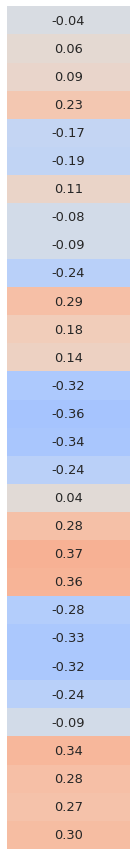

In [217]:
plt.figure(figsize=(2,24/2))


corr_mat =  df_partial_corrs[['partial corr']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = corr_mat, fmt = '.2f',
                annot_kws={'size':13})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('temp.jpg')


In [218]:
#model 3 (PRIMARY) inverse-variance weighting

<AxesSubplot:>

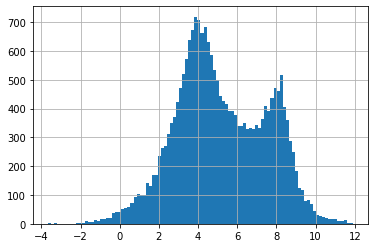

In [219]:
np.log(df_run['pop_density']).hist(bins=100)

In [220]:
df_run['Median House Price 100k'].describe()

count    22010.000000
mean       212.702023
std        183.980332
min          9.999000
25%        108.158914
50%        156.238878
75%        246.200000
max       2000.001000
Name: Median House Price 100k, dtype: float64

In [221]:
np.percentile(df_run['frac_pop_included_in_Optum'], 90)

0.07969706137896534

In [222]:
1/0.009224742094860159

108.40411468600081

In [223]:
df_run = df_ans.copy()

df_run['Total Pop 100k'] = df_run['Total Pop'] / 10000
df_run['Pop Density 1k'] = df_run['pop_density'] / 10
df_run['Log Pop Density'] = np.log10(df_run['pop_density']) / 100
df_run['Median House Price 100k'] = df_run['median_house_price'] / 10000


df_run['phat'] = df_run['frac_pop_included_in_Optum'].clip(lower = np.percentile(df_run['frac_pop_included_in_Optum'], 10),
                                                          upper = np.percentile(df_run['frac_pop_included_in_Optum'], 90))
df_run['weight'] = df_run['Total Pop']/df_run['phat']/(1-df_run['phat'])

In [224]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

In [225]:
features = [ 'Total Pop 100k', 'Log Pop Density',
            #'Pop Density 1k', 
           'frac_female',  'frac_white', 'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 'frac_under_18',
            'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
            'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance', 'frac_lt_hs',
        'frac_hs', 'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'Median House Price 100k']

df_corr = pd.DataFrame([], columns = ['corr'])

i = 0
for feature in features:
    cc = corr(df_run[feature], df_run['frac_pop_included_in_Optum'], df_run['weight'])
    df_corr.loc[i] = cc
    i += 1

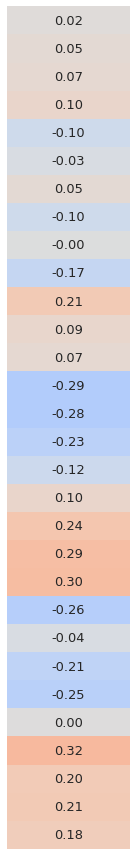

In [226]:
plt.figure(figsize=(2,24/2))

sns.heatmap(df_corr,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = df_corr, fmt = '.2f',
                annot_kws={'size':13})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('temp.jpg')


In [227]:
#full multivariable model

In [228]:
df_run['count'].sum()

12007276

In [229]:
df_run['count'].sum() / df_run['Total Pop'].sum() * 100

3.931055447567526

In [230]:
df_run.frac_pop_included_in_Optum.describe()

count    22010.000000
mean         0.049256
std          0.385392
min          0.000000
25%          0.018002
50%          0.032249
75%          0.052453
max         43.068557
Name: frac_pop_included_in_Optum, dtype: float64

In [231]:
features = [ 'Total Pop 100k', 'Log Pop Density',
            #'Pop Density 1k',
            'frac_female', 
            'frac_black',
       'frac_hispanic', 'frac_asian', 'frac_other', 
            'frac_18_to_40', 'frac_40_to_60',  'frac_60_to_80', 'frac_80_plus',
             'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
        'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_no_health_insurance', 
        'frac_hs',  'frac_some_college', 'frac_college',
       'frac_graduate', 'frac_houses_owner_occupied', 'Median House Price 100k']

#features = []

X = sm.add_constant(df_run[features] ).fillna(0)

X = pd.concat([X, pd.get_dummies(df_run['State']).iloc[:,:-1]], axis=1)
y = df_run['frac_pop_included_in_Optum'] 

est = sm.WLS(y, X, weights = df_run['weight']).fit() #maxiter=50000, method='nm') # weights = df_plot['Total Pop']
est.summary2()



<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Weighted least squares
===============================================================================
Model:              WLS                        Adj. R-squared:     0.506       
Dependent Variable: frac_pop_included_in_Optum AIC:                -103838.7171
Date:               2022-09-16 16:34           BIC:                -103222.7746
No. Observations:   22010                      Log-Likelihood:     51996.      
Df Model:           76                         F-statistic:        297.2       
Df Residuals:       21933                      Prob (F-statistic): 0.00        
R-squared:          0.507                      Scale:              127.78      
--------------------------------------------------------------------------------
                             Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------------------
const                       -0.0291    0.0055  -5.3083  0.0000  -0.0398  -0.0183
Total Pop 100k              -0.0003    0.0001  -3.8315  0.0001  -0.0004  -0.0001
Log Pop Density              0.5062    0.0225  22.5344  0.0000   0.4622   0.5502
frac_female                  0.0297    0.0048   6.1748  0.0000   0.0203   0.0391
frac_black                  -0.0059    0.0009  -6.6738  0.0000  -0.0077  -0.0042
frac_hispanic                0.0021    0.0012   1.7109  0.0871  -0.0003   0.0045
frac_asian                  -0.0052    0.0018  -2.8510  0.0044  -0.0088  -0.0016
frac_other                  -0.0204    0.0028  -7.4029  0.0000  -0.0258  -0.0150
frac_18_to_40               -0.0166    0.0037  -4.5390  0.0000  -0.0238  -0.0095
frac_40_to_60                0.0542    0.0054  10.1033  0.0000   0.0437   0.0647
frac_60_to_80                0.0058    0.0044   1.3212  0.1865  -0.0028   0.0145
frac_80_plus                 0.0551    0.0094   5.8689  0.0000   0.0367   0.0734
frac_15k_to_30k             -0.0142    0.0050  -2.8216  0.0048  -0.0241  -0.0043
frac_30k_to_45k             -0.0073    0.0049  -1.4786  0.1393  -0.0170   0.0024
frac_45k_to_60k             -0.0035    0.0054  -0.6496  0.5159  -0.0141   0.0071
frac_60k_to_100k            -0.0014    0.0038  -0.3572  0.7210  -0.0089   0.0061
frac_100k_to_125k            0.0143    0.0067   2.1473  0.0318   0.0012   0.0274
frac_125k_to_200k            0.0106    0.0049   2.1787  0.0294   0.0011   0.0202
frac_gt_200k                 0.0458    0.0053   8.5675  0.0000   0.0353   0.0562
frac_unemployed             -0.0018    0.0050  -0.3543  0.7231  -0.0117   0.0081
frac_no_health_insurance    -0.0207    0.0028  -7.4310  0.0000  -0.0261  -0.0152
frac_hs                      0.0278    0.0039   7.0516  0.0000   0.0201   0.0355
frac_some_college           -0.0026    0.0031  -0.8456  0.3978  -0.0088   0.0035
frac_college                 0.0496    0.0041  11.9658  0.0000   0.0415   0.0578
frac_graduate               -0.0121    0.0042  -2.8788  0.0040  -0.0203  -0.0039
frac_houses_owner_occupied   0.0039    0.0014   2.8093  0.0050   0.0012   0.0066
Median House Price 100k      0.0000    0.0000   0.0722  0.9424  -0.0000   0.0000
Alabama                      0.0064    0.0022   2.9525  0.0032   0.0021   0.0106
Alaska                      -0.0133    0.0025  -5.3753  0.0000  -0.0182  -0.0085
Arizona                      0.0316    0.0022  14.4206  0.0000   0.0273   0.0359
Arkansas                     0.0135    0.0023   5.7889  0.0000   0.0089   0.0181
California                  -0.0011    0.0020  -0.5222  0.6015  -0.0051   0.0029
Colorado                     0.0411    0.0023  18.0177  0.0000   0.0366   0.0456
Connecticut                  0.0034    0.0023   1.4562  0.1454  -0.0012   0.0079
Delaware                    -0.0163    0.0024  -6.7259  0.0000  -0.0210  -0.0115
District of Columbia         0.0096    0.0035   2.7525  0.0059   0.0027   0.0164
Florida                      0.0185    0.0021   9.0063  0.0000   0.0145   0.0226
Georgia        

In [232]:
results_as_html = est.summary().tables[1].as_html()
temp = pd.read_html(results_as_html, header=0, index_col=0)[0]
temp[1:27]

,coef,std err,t,P>|t|,[0.025,0.975]
Total Pop 100k,-3.000000e-04,0.000069,-3.831,0.000,-0.000000,-0.000000
Log Pop Density,5.062000e-01,0.022000,22.534,0.000,0.462000,0.550000
frac_female,2.970000e-02,0.005000,6.175,0.000,0.020000,0.039000
frac_black,-5.900000e-03,0.001000,-6.674,0.000,-0.008000,-0.004000
frac_hispanic,2.100000e-03,0.001000,1.711,0.087,-0.000000,0.004000
frac_asian,-5.200000e-03,0.002000,-2.851,0.004,-0.009000,-0.002000
frac_other,-2.040000e-02,0.003000,-7.403,0.000,-0.026000,-0.015000
frac_18_to_40,-1.660000e-02,0.004000,-4.539,0.000,-0.024000,-0.009000
frac_40_to_60,5.420000e-02,0.005000,10.103,0.000,0.044000,0.065000
frac_60_to_80,5.800000e-03,0.004000,1.321,0.186,-0.003000,0.014000


In [233]:
np.round(temp.iloc[1,1],100)

6.9e-05

In [234]:
# partial R^2s

In [235]:
features = ['Total Pop 100k', 'Log Pop Density',
          #  'Pop Density 1k',
    'frac_female',  'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
    'Median House Price 100k'
     #'food_insecurity', 'pct_snap', 'lila_tracts'
           ]
df_partial_corrs = pd.DataFrame([], columns = ['coef', 'std err', 'p', 'partial corr'])
i=0

for feature in features:
    
    print(feature)


    X = sm.add_constant(pd.get_dummies(df_run['State']).iloc[:,:-1])
    y = df_run['frac_pop_included_in_Optum']*100
    weight = df_run['weight']

    est = sm.WLS(y, X, weights=weight).fit() 
    resid_Optum = est.resid


    y = df_run[feature]

    est = sm.WLS(y, X, weights = weight).fit() 
    resid_feature = est.resid

    X = sm.add_constant(df_run[feature])
    y = resid_Optum

    est = sm.WLS(y, X, weights = weight).fit() 

    results_as_html = est.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]

    df_partial_corrs.loc[i] = list(temp.loc[feature,['coef', 'std err', 'P>|t|']]) + list([corr(resid_feature, resid_Optum, weight)])
    i += 1


Total Pop 100k
Log Pop Density
frac_female
frac_white
frac_black
frac_hispanic
frac_asian
frac_other
frac_under_18
frac_18_to_40
frac_40_to_60
frac_60_to_80
frac_80_plus
frac_lt_15k
frac_15k_to_30k
frac_30k_to_45k
frac_45k_to_60k
frac_60k_to_100k
frac_100k_to_125k
frac_125k_to_200k
frac_gt_200k
frac_unemployed
frac_no_health_insurance
frac_lt_hs
frac_hs
frac_some_college
frac_college
frac_graduate
frac_houses_owner_occupied
Median House Price 100k


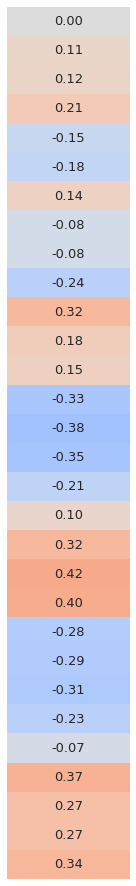

In [236]:
plt.figure(figsize=(2,24/2 * 30/29))


corr_mat =  df_partial_corrs[['partial corr']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = corr_mat, fmt = '.2f',
                annot_kws={'size':13})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('temp.jpg', dpi=400)


In [105]:
#correlations for the top 10 most populous states

In [106]:
df_ans.groupby('State')['Total Pop'].sum().sort_values()[-10:]

State
Michigan          9.608630e+06
North Carolina    9.746513e+06
Georgia           9.771989e+06
Ohio              1.137390e+07
Illinois          1.224644e+07
Pennsylvania      1.233860e+07
New York          1.893617e+07
Florida           1.943096e+07
Texas             2.637811e+07
California        3.714699e+07
Name: Total Pop, dtype: float64

In [121]:
features = ['Total Pop 100k', 'Log Pop Density',
          #  'Pop Density 1k',
    'frac_female',  'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
    'Median House Price 100k' ]

<AxesSubplot:>

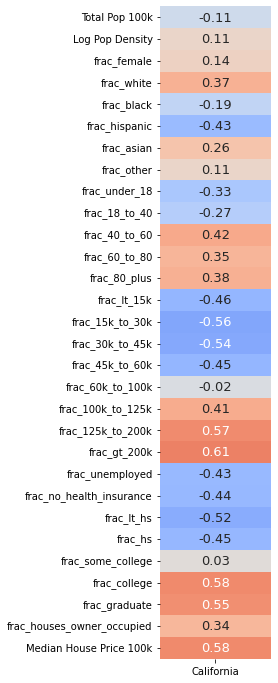

In [122]:
plt.figure(figsize=(2,24/2))

state = 'California'

df_temp = df_run[df_run.State == state].copy()

df_corr = pd.DataFrame( columns = ['corr'], index=features)


for feature in features:
    df_corr.loc[feature] = corr(df_temp[feature], df_temp['frac_pop_included_in_Optum'], df_temp['weight'])


df_corr.rename(columns = {'corr': state}, inplace=True)
df_corr[state] = pd.to_numeric(df_corr[state])

sns.heatmap(df_corr,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(df_corr,2),
                annot_kws={'size':13})




In [123]:

df_corrs = pd.DataFrame([], index = features)

states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

for state in states:  
    print(state)
    df_temp = df_run[df_run.State == state].copy()
    df_corr = pd.DataFrame( columns = ['corr'], index=features)
    for feature in features:
        df_corr.loc[feature] = corr(df_temp[feature], df_temp['frac_pop_included_in_Optum'], df_temp['weight'])
    df_corr.rename(columns = {'corr': state}, inplace=True)
    df_corr[state] = pd.to_numeric(df_corr[state])
    

    df_corrs = pd.concat([df_corrs, df_corr], axis=1)



California
Texas
Florida
New York
Pennsylvania
Illinois
Ohio
Georgia
North Carolina
Michigan


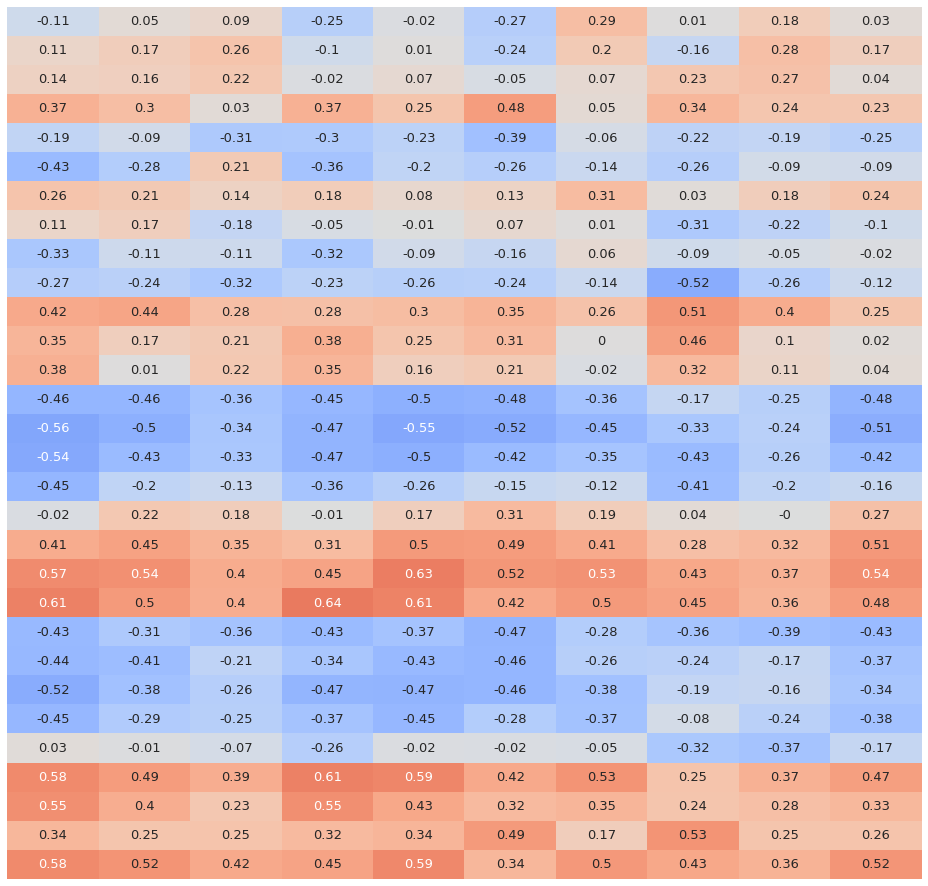

In [125]:
plt.figure(figsize=(1.3*10 ,24/2 * 30/29 ))

sns.heatmap(df_corrs,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = np.round(df_corrs,2),
                annot_kws={'size':13})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('temp.jpg', dpi=200)



In [929]:
#Maps

In [930]:
#step 1 is to roll down to census tract level

In [1229]:
df_crosswalk_2 = pd.read_excel('ZIP_TRACT_092019.xlsx')

In [1230]:
df_ans['split_zip'] = df_ans.ZIPCODE_5.str.split('_')
df_temp = df_ans.explode('split_zip')
df_temp['zip_int'] = df_temp.split_zip.astype(int)

df_temp=pd.merge(df_temp, df_crosswalk_2[['tract', 'zip', 'res_ratio']], left_on = 'zip_int', right_on = 'zip')

In [1231]:
df_temp

,ZIPCODE_5,Total Pop,Square Miles,frac_white,frac_black,frac_hispanic,frac_asian,frac_other,frac_under_18,frac_18_to_40,...,pop_june1,pop_wholetime,pop_oneday,count,frac_pop_included_in_Optum,split_zip,zip_int,tract,zip,res_ratio
0,36544,10762.785326,45.321529,0.732164,0.118111,0.035894,0.093836,0.019996,0.223697,0.254843,...,694,535,866,866,0.080462,36544,36544,1097006701,36544,0.375575
1,36544,10762.785326,45.321529,0.732164,0.118111,0.035894,0.093836,0.019996,0.223697,0.254843,...,694,535,866,866,0.080462,36544,36544,1097007201,36544,0.135108
2,36544,10762.785326,45.321529,0.732164,0.118111,0.035894,0.093836,0.019996,0.223697,0.254843,...,694,535,866,866,0.080462,36544,36544,1097006702,36544,0.431460
3,36544,10762.785326,45.321529,0.732164,0.118111,0.035894,0.093836,0.019996,0.223697,0.254843,...,694,535,866,866,0.080462,36544,36544,1097006501,36544,0.009862
4,36544,10762.785326,45.321529,0.732164,0.118111,0.035894,0.093836,0.019996,0.223697,0.254843,...,694,535,866,866,0.080462,36544,36544,1097007300,36544,0.047995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166577,82410_82411_82434_82422,1252.978957,1021.092197,0.917540,0.001221,0.050017,0.001212,0.030009,0.211995,0.235418,...,17,14,22,22,0.017558,82422,82422,56003962700,82422,0.000000
166578,82426_82441,2961.381521,1013.816803,0.852699,0.003923,0.120798,0.000937,0.021643,0.270933,0.225145,...,37,14,48,48,0.016209,82426,82426,56003962700,82426,0.969321
166579,82426_82441,2961.381521,1013.816803,0.852699,0.003923,0.120798,0.000937,0.021643,0.270933,0.225145,...,37,14,48,48,0.016209,82426,82426,56003962600,82426,0.030679
166580,82426_82441,2961.381521,1013.816803,0.852699,0.003923,0.120798,0.000937,0.021643,0.270933,0.225145,...,37,14,48,48,0.016209,82441,82441,56003962600,82441,0.294872


In [1232]:
weighted_average_metrics = ['frac_pop_included_in_Optum']


def weighted_avg(group, column, weight):
    x = group[column]
    w = group[weight]
    return (x * w).sum() /  w.sum()

df_unroll = pd.DataFrame(df_temp.tract.unique(), columns = ['tract'])

for column in weighted_average_metrics:
    df_unroll = pd.merge(df_unroll, pd.DataFrame(df_temp.groupby('tract').apply(weighted_avg, column, 'res_ratio'), 
                               columns = [column]), on='tract')


In [1233]:
df_unroll

,tract,frac_pop_included_in_Optum
0,1097006701,0.080363
1,1097007201,0.078968
2,1097006702,0.079278
3,1097006501,0.074020
4,1097007300,0.118514
...,...,...
72557,56001963000,0.026410
72558,56001963100,0.026410
72559,56007968000,0.068708
72560,56015957800,0.029045


In [1234]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import ImageGrid
import us
from shapely.geometry import Point, Polygon

In [1235]:
contiguous_states = ['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'ID', 'IL', 'IN', 'IA', 'KS',
                     'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 
                     'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
                     'WA', 'WV', 'WI', 'WY']
others = ['AK', 'HI']

state_shapes = pd.DataFrame([])
tract_shapes = pd.DataFrame([])

for state in us.states.STATES:
    if state.abbr in contiguous_states:
        state_shapes = pd.concat([state_shapes, gpd.read_file(state.shapefile_urls('state'))], axis=0)
        tract_shapes = pd.concat([tract_shapes, gpd.read_file(state.shapefile_urls('tract'))], axis=0)

In [1236]:
us.states.HI

<State:Hawaii>

In [1237]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [1238]:
tract_shapes['GEOID'] = tract_shapes.GEOID10.astype(int)
df_temp = pd.merge(tract_shapes[['GEOID', 'geometry']],df_unroll, left_on='GEOID', right_on='tract')

In [1239]:
df_temp = df_temp.to_crs(epsg=3857)
state_shapes = state_shapes.to_crs(epsg=3857)

In [1240]:
df_temp['representation'] = 100 * df_temp.frac_pop_included_in_Optum
df_temp

,GEOID,geometry,tract,frac_pop_included_in_Optum,representation
0,1005950300,"POLYGON ((-9520870.736 3745799.800, -9520881.5...",1005950300,0.084224,8.422370
1,1005950900,"POLYGON ((-9480426.695 3741094.073, -9480434.5...",1005950900,0.088533,8.853302
2,1005950800,"POLYGON ((-9478711.929 3751415.312, -9478480.0...",1005950800,0.087470,8.746958
3,1005950700,"POLYGON ((-9478385.318 3749075.547, -9478384.5...",1005950700,0.080152,8.015164
4,1005950600,"POLYGON ((-9478378.528 3748893.961, -9478377.7...",1005950600,0.071822,7.182203
...,...,...,...,...,...
71905,56013000400,"POLYGON ((-12192363.632 5313559.534, -12192363...",56013000400,0.055351,5.535082
71906,56013000100,"POLYGON ((-12110118.454 5293807.976, -12110193...",56013000100,0.021127,2.112729
71907,56013940100,"POLYGON ((-12119534.079 5292687.821, -12119582...",56013940100,0.117491,11.749144
71908,56013000300,"POLYGON ((-12121152.108 5292007.499, -12121203...",56013000300,0.033225,3.322528


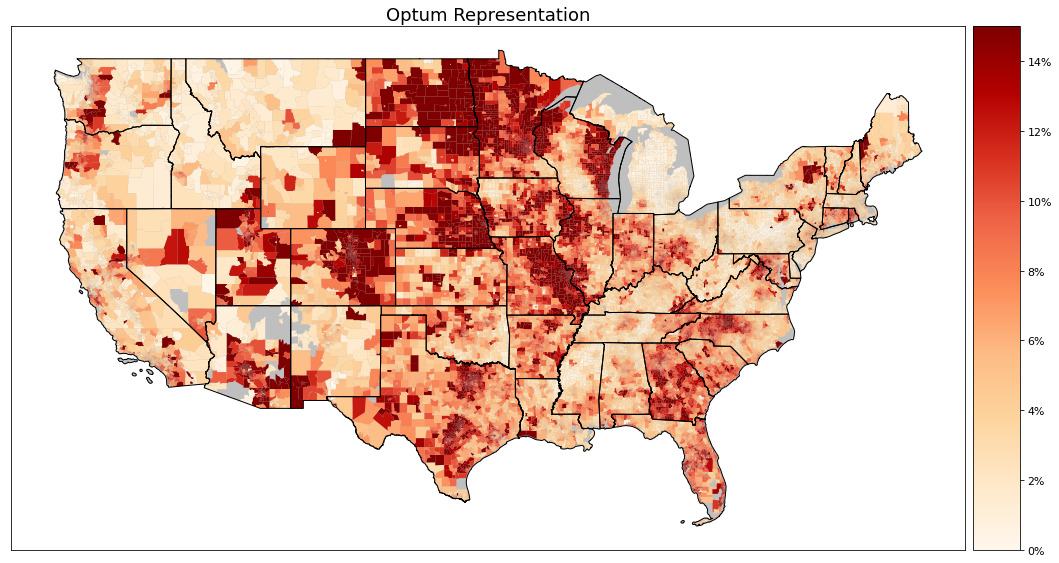

In [1241]:
fig, ax = plt.subplots(1,1,figsize=(15,17 * 3.5/7.5))

state_shapes.plot(color = 'gray', alpha=0.5, ax=ax)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

df_temp.plot(column='representation',
             cmap='OrRd',
             legend=True,
                vmin = 0,
                vmax = 15,
                ax=ax,
                cax=cax)


state_shapes.boundary.plot(color='k', ax=ax, linewidth= 1)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
    
ax.set_title('Optum Representation', fontsize=18)
    
cax.tick_params(labelsize=11)
cax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
cax.set_yticklabels(['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%'])


plt.tight_layout()
plt.savefig('map.jpg', dpi=200)


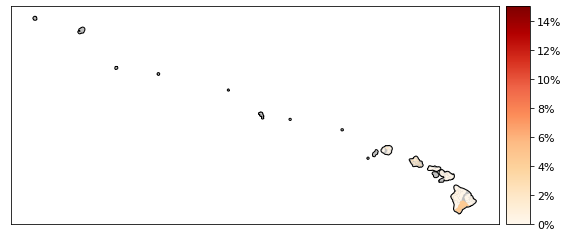

In [1242]:
state = us.states.HI

state_shapes_o = gpd.read_file(state.shapefile_urls('state'))
tract_shapes_o = gpd.read_file(state.shapefile_urls('tract')) 

tract_shapes_o['GEOID'] = tract_shapes_o.GEOID10.astype(int)
df_temp = pd.merge(tract_shapes_o[['GEOID', 'geometry']],df_unroll, left_on='GEOID', right_on='tract')

df_temp = df_temp.to_crs(epsg=3857)
state_shapes_o = state_shapes_o.to_crs(epsg=3857)

df_temp['representation'] = 100 * df_temp.frac_pop_included_in_Optum



fig, ax = plt.subplots(1,1,figsize=(8,8))

state_shapes_o.plot(color = 'gray', alpha=0.5, ax=ax)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

df_temp.plot(column='representation',
             cmap='OrRd',
                legend=True,
                vmin = 0,
                vmax = 15,
                ax=ax,
                cax=cax)

#county_shape.boundary.plot(color='k', ax=ax, linewidth= 0.5)
state_shapes_o.boundary.plot(color='k', ax=ax, linewidth= 1)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

cax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
cax.set_yticklabels(['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%'])
    
ax.set_title('', fontsize=18)
    
cax.tick_params(labelsize=11)

plt.tight_layout()
plt.savefig('map_HI.jpg', dpi=200)



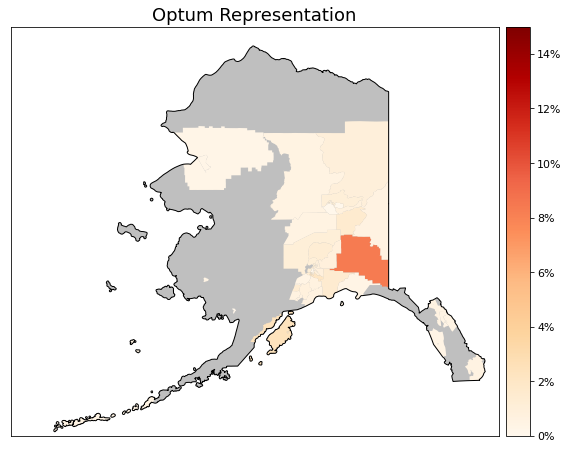

In [1243]:
state = us.states.AK

state_shapes_o = gpd.read_file(state.shapefile_urls('state'))
tract_shapes_o = gpd.read_file(state.shapefile_urls('tract')) 

tract_shapes_o['GEOID'] = tract_shapes_o.GEOID10.astype(int)
df_temp = pd.merge(tract_shapes_o[['GEOID', 'geometry']],df_unroll, left_on='GEOID', right_on='tract')

df_temp = df_temp.to_crs(epsg=3857)
state_shapes_o = state_shapes_o.to_crs(epsg=3857)

df_temp['representation'] = 100 * df_temp.frac_pop_included_in_Optum



fig, ax = plt.subplots(1,1,figsize=(8,8))

state_shapes_o.plot(color = 'gray', alpha=0.5, ax=ax)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

df_temp.plot(column='representation',
             cmap='OrRd',
                legend=True,
                vmin = 0,
                vmax = 15,
                ax=ax,
                cax=cax)

#county_shape.boundary.plot(color='k', ax=ax, linewidth= 0.5)
state_shapes_o.boundary.plot(color='k', ax=ax, linewidth= 1)


ax.set_xlim([-2.05e7, -1.43e7])
ax.set_ylim([6.6e6, 11.8e6])

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

cax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14])
cax.set_yticklabels(['0%', '2%', '4%', '6%', '8%', '10%', '12%', '14%'])
    
ax.set_title('Optum Representation', fontsize=18)
    
cax.tick_params(labelsize=11)

plt.tight_layout()
plt.savefig('map_AK.jpg', dpi=200)

In [ ]:
#code that tries to do some re-weighting

In [184]:
df[['frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k']]#*df['Total Pop']

,frac_lt_15k,frac_15k_to_30k,frac_30k_to_45k,frac_45k_to_60k,frac_60k_to_100k,frac_100k_to_125k,frac_125k_to_200k,frac_gt_200k
0,0.198440,0.316291,0.140381,0.077123,0.151646,0.072790,0.010399,0.032929
1,0.137390,0.196361,0.180050,0.168130,0.176286,0.069009,0.040151,0.032622
2,0.007223,0.135634,0.080257,0.227929,0.353933,0.109149,0.072231,0.013644
3,0.162162,0.183346,0.174580,0.107378,0.279766,0.061359,0.025566,0.005844
4,0.163732,0.192488,0.095070,0.153169,0.200704,0.051056,0.126174,0.017606
...,...,...,...,...,...,...,...,...
73051,0.123077,0.149038,0.090385,0.177885,0.263462,0.170192,0.019231,0.006731
73052,0.122762,0.108696,0.180307,0.126598,0.200767,0.170077,0.086957,0.003836
73053,0.109624,0.182707,0.214102,0.091096,0.198147,0.067936,0.123520,0.012867
73054,0.082537,0.197220,0.163336,0.126846,0.273675,0.072111,0.073849,0.010426


In [185]:
df_ans['State']

0        Alabama
1        Alabama
2        Alabama
3        Alabama
4        Alabama
          ...   
22005    Wyoming
22006    Wyoming
22007    Wyoming
22008    Wyoming
22009    Wyoming
Name: State, Length: 22010, dtype: object

In [380]:
state = 'California'

df_reweight = pd.DataFrame(df[df.State==state][['frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k']].multiply(df[df.State==state]['Total Pop'], axis="index").sum() / df[df.State==state]['Total Pop'].sum()).rename(columns={0:'census'})

df_reweight['optum'] = df_ans[df_ans.State==state][['frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
       'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k']].multiply(df_ans[df_ans.State==state]['count'], axis="index").sum() / df_ans[df_ans.State==state]['count'].sum()

df_reweight['hiv'] = [2.5, 1.3, 1.2, 0.4, 0.4, 0.4, 0.4, 0.4]
df_reweight['hiv'] =[42.6, 40.6, 37, 30.4, 24.0, 14.5, 10, 8 ]

df_reweight

,census,optum,hiv
frac_lt_15k,0.094021,0.082356,42.6
frac_15k_to_30k,0.121132,0.107353,40.6
frac_30k_to_45k,0.117495,0.106704,37.0
frac_45k_to_60k,0.103767,0.096847,30.4
frac_60k_to_100k,0.216109,0.211650,24.0
frac_100k_to_125k,0.094229,0.098182,14.5
frac_125k_to_200k,0.148349,0.165200,10.0
frac_gt_200k,0.102386,0.130396,8.0


In [381]:
(df_reweight.optum * df_reweight.hiv).sum()

23.957527192716448

In [382]:
(df_reweight.census * df_reweight.hiv).sum()

25.280630208534784

In [383]:
(1.6/25.3)*100

6.324110671936759

In [384]:
ls

Dahlen_Optum_Letter_Draft5.docx      ZIP_TRACT_092019.xlsx
Dahlen_Optum_Letter_team draft.docx  at least one day.jpg
EHR_bias_final.docx                  correcting_bias.pptx
Fig1.jpg                             coverage.jpg
Fig2.jpg                             coverage2.jpg
HIV.xlsx                             final_figures.jpg
OpPop2018.csv                        final_figures.pptx
Optum bias, results.pptx             list_states.jpg
Optum bias, results2.pptx            list_states_1.jpg
OptumPop2018.csv                     list_states_2.jpg
Optum_Letter_Draft7.docx             map.jpg
Optum_Letter_Draft9.docx             map_AK.jpg
Optum_pop_2018_2.csv                 map_HI.jpg
Optum_pop_2018_2.xlsx                optum.ipynb
SuppFig1.jpg                         scratchbook.xlsx
SuppFig2.jpg                         scratchpad.xlsx
TRACT_ZIP_032019.xlsx                temp.jpg
Tables_and_Figures.docx              ~$HIV.xlsx
Untitled.ipynb                       ~$correcting_bias.pptx

In [255]:
df_hiv = pd.read_excel('HIV.xlsx')
df_hiv = pd.merge(df_ans, df_hiv, on='ZIPCODE_5', how='left').fillna(0)

In [385]:
df_hiv[df_hiv.State=='California'].HIV.sum()

1503.0

In [386]:
df_hiv[df_hiv.State=='California']['count'].sum()

1236987

In [258]:
13303./12007276 *100

0.11079115696182881

In [387]:
1503/1236987*100

0.12150491476466609

In [264]:
df_hiv['hiv_rate'] = df_hiv.HIV/df_hiv['count']

In [388]:
(df_hiv['count'] * df_hiv.hiv_rate).sum() / df_hiv['count'].sum() * 100

0.11079115696182881

In [389]:
(df_hiv['Total Pop'] * df_hiv.hiv_rate).sum() / df_hiv['Total Pop'].sum() * 100

0.11350093846039205

In [390]:
(df_hiv[df_hiv.State=='California']['count'] * df_hiv[df_hiv.State=='California'].hiv_rate).sum() / df_hiv[df_hiv.State=='California']['count'].sum() * 100



0.12150491476466609

In [391]:
(df_hiv[df_hiv.State=='California']['Total Pop'] * df_hiv[df_hiv.State=='California'].hiv_rate).sum() / df_hiv[df_hiv.State=='California']['Total Pop'].sum() * 100

0.12202558164298322

In [268]:
df_hiv.columns

Index(['ZIPCODE_5', 'Total Pop', 'Square Miles', 'frac_female', 'frac_white',
       'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
       'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80',
       'frac_80_plus', 'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k',
       'frac_45k_to_60k', 'frac_60k_to_100k', 'frac_100k_to_125k',
       'frac_125k_to_200k', 'frac_gt_200k', 'frac_unemployed',
       'frac_no_health_insurance', 'frac_lt_hs', 'frac_hs',
       'frac_some_college', 'frac_college', 'frac_graduate',
       'frac_houses_owner_occupied', 'median_house_price', 'County',
       'County Code', 'State', 'State Code', 'pop_density', 'pop_june1',
       'pop_wholetime', 'pop_oneday', 'count', 'frac_pop_included_in_Optum',
       'HIV', 'hiv_rate'],
      dtype='object')

In [363]:
features = [ 'frac_lt_15k',
             'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
        'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k','frac_gt_200k']

#features = []

df_tt = df_hiv[(df_hiv.State=='California') & (df_hiv.frac_pop_included_in_Optum > 0)]

X = df_tt[features] .fillna(0)
y = np.array(df_tt['frac_pop_included_in_Optum'].fillna(0).clip(upper=0.3))

est = sm.GLM(y, X, freq_weights = df_tt['Total Pop'], family=sm.families.Binomial()).fit() 
est.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Generalized linear model
====================================================================
Model:              GLM              AIC:            8386498.7844   
Link Function:      Logit            BIC:            -647182329.9100
Dependent Variable: y                Log-Likelihood: -4.1932e+06    
Date:               2022-08-30 13:05 LL-Null:        -4.2466e+06    
No. Observations:   1375             Deviance:       2.5343e+05     
Df Model:           7                Pearson chi2:   2.85e+05       
Df Residuals:       37144228         Scale:          1.0000         
Method:             IRLS                                            
--------------------------------------------------------------------
                    Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
frac_lt_15k        -5.4421   0.0332 -163.9711 0.0000 -5.5071 -5.3770
frac_15k_to_30k    -4.5189   0.0447 -101.2016 0.0000 -4.6064 -4.4314
frac_30k_to_45k    -3.2226   0.0506  -63.6856 0.0000 -3.3217 -3.1234
frac_45k_to_60k    -3.8866   0.0602  -64.5561 0.0000 -4.0046 -3.7686
frac_60k_to_100k   -3.5110   0.0335 -104.9044 0.0000 -3.5766 -3.4454
frac_100k_to_125k  -1.8421   0.0622  -29.5929 0.0000 -1.9642 -1.7201
frac_125k_to_200k  -2.9863   0.0289 -103.2016 0.0000 -3.0430 -2.9296
frac_gt_200k       -1.9078   0.0124 -153.4577 0.0000 -1.9321 -1.8834
====================================================================

"""

In [364]:
np.exp(est.params)

frac_lt_15k          0.004331
frac_15k_to_30k      0.010901
frac_30k_to_45k      0.039853
frac_45k_to_60k      0.020516
frac_60k_to_100k     0.029867
frac_100k_to_125k    0.158477
frac_125k_to_200k    0.050473
frac_gt_200k         0.148411
dtype: float64

In [366]:
avg_optum_rep = (df_tt[features].mean()  * np.exp(est.params)).mean()
df_tt[features] * np.exp(est.params)  / avg_optum_rep

,frac_lt_15k,frac_15k_to_30k,frac_30k_to_45k,frac_45k_to_60k,frac_60k_to_100k,frac_100k_to_125k,frac_125k_to_200k,frac_gt_200k
1149,0.052501,0.227942,0.795230,0.371717,1.142716,2.477295,0.964355,1.442434
1150,0.050240,0.115516,0.563727,0.175548,0.926062,2.633598,1.753994,3.940105
1151,0.080985,0.215656,0.659541,0.419200,0.960872,2.182019,0.903183,2.155336
1152,0.164709,0.327754,0.687945,0.250470,0.852410,1.487021,0.569517,1.045614
1153,0.078433,0.339752,0.950749,0.560789,1.088980,1.026348,0.412289,0.333669
...,...,...,...,...,...,...,...,...
2520,0.129434,0.265790,0.998587,0.507148,0.664470,1.335526,0.703239,0.767091
2521,0.098228,0.147859,0.347866,0.314555,1.228745,1.296790,1.364907,2.545381
2522,0.059345,0.105913,0.506573,0.302909,1.198709,2.340033,1.405167,2.996142
2523,0.131635,0.464993,0.914612,0.335030,0.788467,0.878157,0.427401,0.160584


In [371]:
X = df_tt[features] * np.exp(est.params)  / avg_optum_rep
y = np.array(df_tt['hiv_rate'].fillna(0).clip(upper=0.3))

est2 = sm.GLM(y, X, freq_weights = df_tt['Total Pop'], family=sm.families.Gaussian()).fit() 
est2.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Generalized linear model
====================================================================
Model:              GLM              AIC:            -312897766.5763
Link Function:      identity         BIC:            -647435286.0700
Dependent Variable: y                Log-Likelihood: 1.5645e+08     
Date:               2022-08-30 13:05 LL-Null:        1.5610e+08     
No. Observations:   1375             Deviance:       477.51         
Df Model:           7                Pearson chi2:   478.           
Df Residuals:       37144228         Scale:          1.2856e-05     
Method:             IRLS                                            
--------------------------------------------------------------------
                    Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
frac_lt_15k         0.0174   0.0000  634.8938 0.0000  0.0173  0.0174
frac_15k_to_30k    -0.0009   0.0000  -57.4492 0.0000 -0.0009 -0.0009
frac_30k_to_45k     0.0001   0.0000   21.5851 0.0000  0.0001  0.0001
frac_45k_to_60k    -0.0011   0.0000  -90.9968 0.0000 -0.0011 -0.0010
frac_60k_to_100k    0.0007   0.0000  143.4869 0.0000  0.0007  0.0007
frac_100k_to_125k   0.0000   0.0000    5.6461 0.0000  0.0000  0.0000
frac_125k_to_200k  -0.0003   0.0000 -133.7828 0.0000 -0.0004 -0.0003
frac_gt_200k        0.0001   0.0000  295.3155 0.0000  0.0001  0.0001
====================================================================

"""

In [373]:
est2.params

frac_lt_15k          0.017393
frac_15k_to_30k     -0.000892
frac_30k_to_45k      0.000108
frac_45k_to_60k     -0.001061
frac_60k_to_100k     0.000670
frac_100k_to_125k    0.000010
frac_125k_to_200k   -0.000348
frac_gt_200k         0.000126
dtype: float64

In [379]:
(df_tt[features].mean() * est2.params.clip(lower=0)).sum() * 100

0.1936072635733113

In [241]:
y

array([0.00359195, 0.        , 0.00562852, ..., 0.        , 0.        ,
       0.        ])

In [236]:
df_tt['Total Pop']

1149    49636.210380
1150    17291.140573
1151    17211.553737
1152     7132.113169
1153    11691.720877
            ...     
2520     1771.187739
2521     2511.716923
2522        5.830205
2523     2268.251636
2524     1147.670025
Name: Total Pop, Length: 1376, dtype: float64

In [401]:
df_run = df_hiv.copy()

df_run['phat'] = df_run['frac_pop_included_in_Optum'].clip(lower = np.percentile(df_run['frac_pop_included_in_Optum'], 10),
                                                          upper = np.percentile(df_run['frac_pop_included_in_Optum'], 90))
df_run['weight'] = df_run['Total Pop']/df_run['phat']/(1-df_run['phat'])

df_run['Total Pop 100k'] = df_run['Total Pop'] / 10000
df_run['Pop Density 1k'] = df_run['pop_density'] / 10
df_run['Log Pop Density'] = np.log10(df_run['pop_density']) / 100
df_run['Median House Price 100k'] = df_run['median_house_price'] / 10000


features = ['Total Pop 100k', 'Log Pop Density',
          #  'Pop Density 1k',
    'frac_female',  'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
                    'frac_under_18', 'frac_18_to_40', 'frac_40_to_60', 'frac_60_to_80', 'frac_80_plus',
     'frac_lt_15k', 'frac_15k_to_30k', 'frac_30k_to_45k', 'frac_45k_to_60k',
           'frac_60k_to_100k', 'frac_100k_to_125k', 'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed', 'frac_no_health_insurance',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
    'Median House Price 100k'
     #'food_insecurity', 'pct_snap', 'lila_tracts'
           ]
df_partial_corrs = pd.DataFrame([], columns = ['coef', 'std err', 'p', 'partial corr'])
i=0

for feature in features:
    
    print(feature)


    X = sm.add_constant(pd.get_dummies(df_run['State']).iloc[:,:-1])
    y = df_run['hiv_rate'].fillna(0)*100
    weight = df_run['Total Pop']

    est = sm.WLS(y, X, weights=weight).fit() 
    resid_Optum = est.resid


    y = df_run[feature]

    est = sm.WLS(y, X, weights = weight).fit() 
    resid_feature = est.resid

    X = sm.add_constant(df_run[feature])
    y = resid_Optum

    est = sm.WLS(y, X, weights = weight).fit() 

    results_as_html = est.summary().tables[1].as_html()
    temp = pd.read_html(results_as_html, header=0, index_col=0)[0]

    df_partial_corrs.loc[i] = list(temp.loc[feature,['coef', 'std err', 'P>|t|']]) + list([corr(resid_feature, resid_Optum, weight)])
    i += 1


Total Pop 100k
Log Pop Density
frac_female
frac_white
frac_black
frac_hispanic
frac_asian
frac_other
frac_under_18
frac_18_to_40
frac_40_to_60
frac_60_to_80
frac_80_plus
frac_lt_15k
frac_15k_to_30k
frac_30k_to_45k
frac_45k_to_60k
frac_60k_to_100k
frac_100k_to_125k
frac_125k_to_200k
frac_gt_200k
frac_unemployed
frac_no_health_insurance
frac_lt_hs
frac_hs
frac_some_college
frac_college
frac_graduate
frac_houses_owner_occupied
Median House Price 100k


In [402]:
df_partial_corrs

,coef,std err,p,partial corr
0,0.007100,0.001,0.000,0.037920
1,3.955200,0.318,0.000,0.095324
2,-0.516100,0.114,0.000,-0.031194
3,-0.167100,0.010,0.000,-0.136282
4,0.338100,0.015,0.000,0.168122
5,0.036100,0.013,0.005,0.024113
6,0.007800,0.032,0.809,0.001906
7,0.078500,0.069,0.256,0.009848
8,-0.628400,0.057,0.000,-0.080145
9,0.720000,0.035,0.000,0.140424


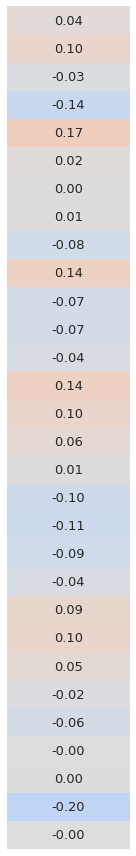

In [403]:
plt.figure(figsize=(2,24/2))


corr_mat =  df_partial_corrs[['partial corr']]

sns.heatmap(corr_mat,
           cmap = "coolwarm",  vmin=-1, vmax=1,  cbar=False, robust=True, annot = corr_mat, fmt = '.2f',
                annot_kws={'size':13})

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('temp.jpg')
